# Cleaning the scraped dataset from sephora.com

In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # python plot most popular , pyplot
import seaborn as sns
import re
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn import ensemble 
import plotly
import plotly.graph_objs as go
from plotly.offline import *
init_notebook_mode(connected=True)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (GradientBoostingRegressor , RandomForestRegressor, BaggingRegressor,
                              ExtraTreesRegressor,AdaBoostRegressor, GradientBoostingClassifier)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 200)

In [542]:
#sephora3.to_csv('sephora.csv')

In [543]:
sephora3 = pd.read_csv('sephora_final.csv', encoding='latin-1')
sephora3['index1'] = sephora3.index

sephora3[59:62]

,brand,product_name,og_price,price,discounted_value,on_sale,size_ounces,loves,product_type1,product_type2,product_type3,about,val_normal_skin,oily_skin,dry_skin,combination_skin,val_combination_skin,sensitive_skin,all_skin,skin_type,vegan,dermatologist_tested,research,formulated_without,clean,rating,would_recommend,reviews,fiveStars,fourStars,threeStars,twoStars,oneStar,index1
59,OUAI,Matte Pomade,$24.00,24.0,False,False,1.7 oz/ 50 mLâ¢ITEM 1837202,5575,Hair,Hair Styling & Treatments,Hair Styling Products,Which hair type is it good for?\nâ Straight\...,False,False,False,False,False,False,False,False,False,False,False,True,True,4.1,0.00,198,158,21,13,3,3,59
60,OUAI,Finishing CrÃ¨me,$24.00,24.0,False,False,3.4 oz/ 101 mLâ¢ITEM 1802149,10000,Hair,Hair Styling & Treatments,Hair Styling Products,Which hair type is it good for?\nâ Straight\...,False,False,False,False,False,False,False,False,False,False,False,True,True,4.2,0.94,200,175,12,4,2,7,60
61,OUAI,Air Dry Foam,$28.00,28.0,False,False,4 oz/ 120 mLâ¢ITEM 2030823,9824,Hair,Hair Styling & Treatments,Hair Styling Products,Which hair type is it good for?\nâ Wavy\nâ...,False,False,False,False,False,False,False,False,False,False,False,True,False,4.1,0.00,18,16,2,0,0,0,61


In [511]:
sephora3.dtypes

brand                    object
product_name             object
og_price                 object
price                   float64
discounted_value           bool
on_sale                    bool
size_ounces              object
loves                     int64
product_type1            object
product_type2            object
product_type3            object
about                    object
val_normal_skin            bool
oily_skin                  bool
dry_skin                   bool
combination_skin           bool
val_combination_skin       bool
sensitive_skin             bool
all_skin                   bool
skin_type                  bool
vegan                      bool
dermatologist_tested       bool
research                   bool
formulated_without         bool
clean                      bool
rating                  float64
would_recommend         float64
reviews                   int64
fiveStars                 int64
fourStars                 int64
threeStars                int64
twoStars

## Convert  object to str

In [512]:
sephora3['brand'] = sephora3['brand'].astype('str')
sephora3['loves'] = sephora3['loves'].astype('int')
sephora3['about'] = sephora3['about'].astype('str')
sephora3['og_price'] = sephora3['og_price'].astype('str')
sephora3['product_name'] = sephora3['product_name'].astype('str')
sephora3['product_type1'] = sephora3['product_type1'].astype('str')
sephora3['product_type2'] = sephora3['product_type2'].astype('str')
sephora3['product_type3'] = sephora3['product_type3'].astype('str')
#sephora3['size_ounces'] = sephora3['size_ounces'].astype('int')         ...***** mutates values 
#sephora3['rating'] = sephora3['rating'].astype('int')            ...***** mutates values 
#sephora3['price'] = sephora3['price'].astype('int')            ...***** mutates values 
#sephora3['would_recommend'] = sephora3['would_recommend'].astype('int') ...***** mutates values 

## Remove Ascii Characters

In [573]:
def return_only_ascii(str):
    return ''.join([x for x in str if ord(x) < 128])

# remove ascii characters
sephora3['size_ounces'] = sephora3['size_ounces'].apply(return_only_ascii)
sephora3['product_name'] = sephora3['product_name'].apply(return_only_ascii)
sephora3['brand'] = sephora3['brand'].apply(return_only_ascii)
sephora3['about'] = sephora3['about'].apply(return_only_ascii)

#sephora3[59:62]

## Strip the 'size_ounces' columns

In [514]:
#sephora3['product_size_ounces'] = sephora3['product_size_ounces'].astype(str)

# FIX SIZE_OUNCES COLUMN: 
sephora3['size_ounces'] = sephora3['size_ounces'].str.split('oz').str[0]

sephora3.size_ounces[59:62]

59    1.7 
60    3.4 
61      4 
Name: size_ounces, dtype: object

## Dummification

In [515]:
types = pd.get_dummies(sephora3.set_index('index1').product_type1, 
                       drop_first=False,  prefix='product_type1_')
sephora3 = pd.concat([sephora3, types], axis = 1)
#################################################################
types2 = pd.get_dummies(sephora3.set_index('index1').product_type2, 
                   drop_first=False, prefix='product_type2_')
sephora3 = pd.concat([sephora3, types2], axis = 1)
#################################################################
types3 = pd.get_dummies(sephora3.set_index('index1').product_type3, 
                   drop_first=False, prefix='product_type2_')
sephora3 = pd.concat([sephora3, types3], axis = 1)
#################################################################
brands = pd.get_dummies(sephora3.set_index('index1').brand, 
                       drop_first=False, prefix='brand_')
sephora3 = pd.concat([sephora3, brands], axis = 1)
#################################################################
#size = pd.get_dummies(sephora3.set_index('index1').size_ounces,
 #                      drop_first=False, prefix='size_ounces_')
#sephora3 = pd.concat([sephora3, size], axis = 1)

## Remove products with missing values (loves, ratings, and number of reviews)

In [516]:
print("before", sephora3.shape)

sephora3 = sephora3[sephora3.loves > 1]
sephora3 = sephora3[sephora3.rating > 0]
sephora3 = sephora3[sephora3.reviews > 0]

print("after", sephora3.shape)
print("Rows removed:", 7405 - 6793)

before (7405, 532)
after (6793, 532)
Rows removed: 612


In [517]:
print("before", sephora3.shape)

#sephora3 = sephora3[sephora3.product_type1 != 'nan']
#sephora3 = sephora3[sephora3.product_type2 != 'nan']
#sephora3 = sephora3[sephora3.product_type3 != 'nan']

print("after", sephora3.shape)
print("Rows removed:", 7405 - 6574)

before (6793, 532)
after (6793, 532)
Rows removed: 831


#### For recommendation ML 

In [518]:
sephoraRecommendation = sephora3[sephora3.would_recommend > 0.0]

print(sephoraRecommendation.shape)
print("Rows removed:", 7405 - 1707)

(1880, 532)
Rows removed: 5698


# Label Encoding and dropping duplicate variables 

In [519]:
lencoder = LabelEncoder()

# cant use linear regression for labelencoding... a banana isn't two apples 
# going to dummify anything with nore than 2 values ... T/F

sephora3['would_recommend_label'] = lencoder.fit_transform(sephora3['would_recommend'])
sephora3['discounted_value_label'] = lencoder.fit_transform(sephora3['discounted_value'])
sephora3['on_sale_label'] = lencoder.fit_transform(sephora3['on_sale'])
sephora3['val_normal_skin_label'] = lencoder.fit_transform(sephora3['val_normal_skin'])
sephora3['oily_skin_label'] = lencoder.fit_transform(sephora3['oily_skin'])
sephora3['dry_skin_label'] = lencoder.fit_transform(sephora3['dry_skin'])
sephora3['combination_skin_label'] = lencoder.fit_transform(sephora3['combination_skin'])
sephora3['sensitive_skin_label'] = lencoder.fit_transform(sephora3['sensitive_skin'])
sephora3['all_skin_label'] = lencoder.fit_transform(sephora3['all_skin'])
sephora3['skin_type_label'] = lencoder.fit_transform(sephora3['skin_type'])
sephora3['vegan_label'] = lencoder.fit_transform(sephora3['vegan'])
sephora3['tested_label'] = lencoder.fit_transform(sephora3['dermatologist_tested'])
sephora3['research_label'] = lencoder.fit_transform(sephora3['research'])
sephora3['formulated_without_label'] = lencoder.fit_transform(sephora3['formulated_without'])
sephora3['clean_label'] = lencoder.fit_transform(sephora3['clean'])
#sephora3['derma_tested_label'] = lencoder.fit_transform(sephora3['dermatologist_tested'])

# sephora3.drop("size_ounces", axis=1, inplace=True)
# sephora3.drop("price", axis=1, inplace=True)
sephora3.drop("discounted_value", axis=1, inplace=True)
sephora3.drop("on_sale", axis=1, inplace=True)
sephora3.drop("val_normal_skin", axis=1, inplace=True)
sephora3.drop("oily_skin", axis=1, inplace=True)
sephora3.drop("dry_skin", axis=1, inplace=True)
sephora3.drop("combination_skin", axis=1, inplace=True)
sephora3.drop("sensitive_skin", axis=1, inplace=True)
sephora3.drop("all_skin", axis=1, inplace=True)
sephora3.drop("skin_type", axis=1, inplace=True)
sephora3.drop("vegan", axis=1, inplace=True)
#sephora3.drop("tested", axis=1, inplace=True)
sephora3.drop("research", axis=1, inplace=True)
sephora3.drop("formulated_without", axis=1, inplace=True)
sephora3.drop("clean", axis=1, inplace=True)
sephora3.drop("val_combination_skin", axis=1, inplace=True)
sephora3.drop("dermatologist_tested", axis=1, inplace=True)
# dont drop brand, it's needed for visualizations
sephora3.head(4)

,brand,product_name,og_price,price,size_ounces,loves,product_type1,product_type2,product_type3,about,rating,would_recommend,reviews,fiveStars,fourStars,threeStars,twoStars,oneStar,index1,product_type1__Bath & Body,product_type1__Beauty Supplements,product_type1__Candles & Home Scents,product_type1__Fragrance,product_type1__Gifts,product_type1__Hair,product_type1__Hair Styling & Treatments,product_type1__High Tech Tools,product_type1__Makeup,product_type1__Makeup Palettes,product_type1__Men,product_type1__Mini Size,product_type1__Nail,product_type1__Self Tanners,product_type1__Shaving,product_type1__Skincare,product_type1__Tools & Brushes,product_type1__Value & Gift Sets,product_type1__nan,product_type2__Accessories,product_type2__Bath & Shower,product_type2__Best For,product_type2__Body Care,...,brand__TOM FORD,brand__TOO COOL FOR SCHOOL,brand__TOO FACED,brand__TORY BURCH,brand__TOUCH IN SOL,brand__TRSTIQUE,brand__TWEEZERMAN,brand__URBAN DECAY,brand__VELOUR LASHES,brand__VERB,brand__VERNON FRANCOIS,brand__VERSACE,brand__VIKTOR&ROLF,brand__VIOLET VOSS,brand__VISEART,brand__VITA LIBERATA,brand__VITAL PROTEINS,brand__VITRUVI,brand__VOLITION BEAUTY,brand__VOLUSPA,brand__WANDER BEAUTY,brand__WELL-KEPT,brand__WELLECO,brand__WINKY LUX,brand__YOUTH TO THE PEOPLE,brand__YUNI,brand__YVES SAINT LAURENT,would_recommend_label,discounted_value_label,on_sale_label,val_normal_skin_label,oily_skin_label,dry_skin_label,combination_skin_label,sensitive_skin_label,all_skin_label,skin_type_label,vegan_label,tested_label,research_label,formulated_without_label,clean_label
0,YUNI,SHOWER SHEETS Large Body Wipes,$15.00,15.0,0,8864,Bath & Body,Bath & Shower,Body Wash & Shower Gel,Which skin type is it good for?\n Normal\n Oil...,4.8,0.86,72,55,6,3,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,0,0,1,1,1,1,1,1,1,1,0,0,0,0
1,DR ROEBUCK'S,Straya Soothing Hand + Body Wash,$30.00,30.0,5.07,206,Bath & Body,Bath & Shower,Body Wash & Shower Gel,"What it is:\nA refreshing, super-hydrating was...",4.0,0.96,147,129,11,4,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,1,0,0,1,1,1,1,0,1,0
2,MURAD,Acne Body Wash,$43.00,43.0,8.5,10000,Bath & Body,Bath & Shower,Body Wash & Shower Gel,What it is:\nA triple-action anti-acne body cl...,4.1,0.00,1917,1492,256,88,47,34,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,BOSCIA,Baby Soft Foot Peel,$20.00,20.0,1.34,20000,Bath & Body,Bath & Shower,Scrub & Exfoliants,What it is:\nA natural exfoliating foot peel t...,4.1,0.00,2,1,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0


## calculating the ratio of 1,2,3,4, and 5 star reviews for each product

In [520]:
sephora3['oneStarRatio']=(sephora3['oneStar']/sephora3['reviews']).fillna(0)
sephora3['twoStarsRatio']=(sephora3['twoStars']/sephora3['reviews']).fillna(0)
sephora3['threeStarsRatio']=(sephora3['threeStars']/sephora3['reviews']).fillna(0)
sephora3['fourStarsRatio']=(sephora3['fourStars']/sephora3['reviews']).fillna(0)
sephora3['fiveStarsRatio']=(sephora3['fiveStars']/sephora3['reviews']).fillna(0)
sephora3['fourAnd5StarRatio']=((sephora3['fiveStars']+sephora3['fourStars']) / sephora3['reviews']).fillna(0)

def highrating_above_below_avg(dataframe): 
    """map catagorical labels for generalized by % of 5 star ratings in reviews as well, aveg and  poor as specified by the keys below
    0=above_average, 1=average, 2=below_average, 3= poor"""
    dataframe['fourAnd5StarRatio_rounded']=dataframe['fourAnd5StarRatio'].round(1).astype('str')
    avg_mapping={'1.0': 0,  '0.9':0, '0.8':0, '0.7':1, '0.6':1, '0.5':1, '0.4':1, '0.3':1, '0.2':1, 
                 '0.1':1, '0.0':1}
    dataframe['fourAnd5Star_above_below_avg']=dataframe['fourAnd5StarRatio_rounded'].map(avg_mapping)
    
highrating_above_below_avg(sephora3)

In [521]:
sephora3.fourAnd5Star_above_below_avg.unique()

array([0, 1])

In [522]:
sephora3.fourAnd5Star_above_below_avg.unique()

array([0, 1])

In [523]:
# numerical and categorical features

cat_features = sephora3.select_dtypes(include = ["object"]).columns
num_features = sephora3.select_dtypes(exclude = ["object"]).columns

#num_features = num_features.drop("SalePrice")

print('')
print("Numerical features : " + str(len(num_features)))
print('')
sephNum = sephora3[num_features]
sephCat = sephora3[cat_features]

print(sephNum.columns)
print('')
print("Categorical features : " + str(len(cat_features)))
print('')
print(sephCat.columns)


Numerical features : 531

Index(['price', 'loves', 'rating', 'would_recommend', 'reviews', 'fiveStars',
       'fourStars', 'threeStars', 'twoStars', 'oneStar',
       ...
       'research_label', 'formulated_without_label', 'clean_label',
       'oneStarRatio', 'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio',
       'fiveStarsRatio', 'fourAnd5StarRatio', 'fourAnd5Star_above_below_avg'],
      dtype='object', length=549)

Categorical features : 9

Index(['brand', 'product_name', 'og_price', 'size_ounces', 'product_type1',
       'product_type2', 'product_type3', 'about', 'fourAnd5StarRatio_rounded'],
      dtype='object')


In [524]:
# Log transform of the skewed numerical features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 
# is considered at least moderately skewed

#trainNum = sephora3[['rating_label', 'price_label', 'would_recommend_label', 'size_ounces_label', 
#        'loves']]

"""
skewness = sephNum.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print(str(skewness.shape[0]) + " skewed features to log transform")

skewed_features = skewness.index
sephNum[skewed_features] = np.log1p(sephNum[skewed_features])

skewed_features
"""

# skew doesnt matter for trees, only linear regression 
# so this made everything less correlated to loves... that's bad i think.... 

'\nskewness = sephNum.apply(lambda x: skew(x))\nskewness = skewness[abs(skewness) > 0.5]\n\nprint(str(skewness.shape[0]) + " skewed features to log transform")\n\nskewed_features = skewness.index\nsephNum[skewed_features] = np.log1p(sephNum[skewed_features])\n\nskewed_features\n'

# Visualizations

In [544]:
def column_count(dataframe ,column):
    """count the number of unique items in each column"""
    count=[]
    column_types= [i for i in column.unique()] 
    for c in column_types: 
        count.append((c, len(dataframe[column==c])))    
    return dict(count)

brand_hist=column_count(sephora3,sephora3['brand'])
sorted_by_value_brand_hist = sorted(brand_hist.items(), key=lambda kv: kv[1], reverse=True)
brand_keys=[]
brand_vals=[]
for item in sorted_by_value_brand_hist: 
    brand_keys.append(item[0])
    brand_vals.append(item[1])  
    
#colors=['rgba(5, 102, 141, 1)', 'rgba(2, 128, 144, 1)', 
 #  #     'rgba(0, 168, 150, 1)', 'rgba(2, 195, 154, 1)', 
      #  'rgba(240, 243, 189, 1)']

data = [go.Bar(x=brand_keys[0:50],
               y=brand_vals[0:50] , 
              marker=dict(color='purple'))]

layout = go.Layout(title='Brand Product Count', orientation=90)
fig = go.Figure(data=data, layout=layout)
config = {'displayModeBar': True}
plotly.offline.iplot(fig, config=config)    

In [562]:
sephora3.brand.value_counts().sort_values().plot(kind = 'scatter')

ValueError: plot kind 'scatter' can only be used for data frames

In [579]:
sephora3['brand'].nunique()

316

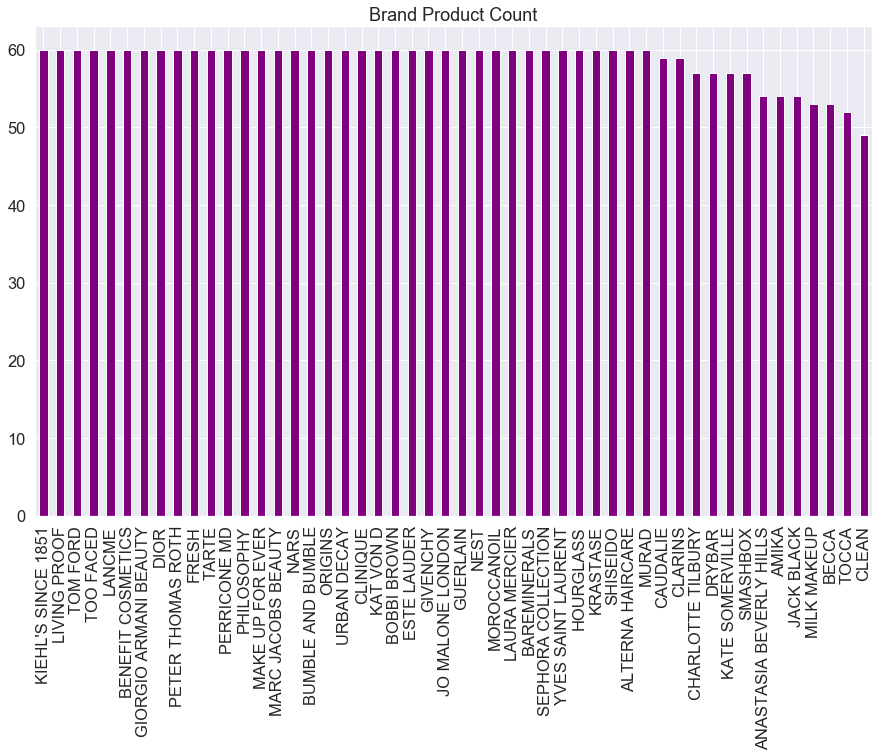

In [578]:
sephora3['brand'].value_counts()[:50].plot(kind='bar', color='purple', figsize=(15,9),
                                          title = "Brand Product Count")

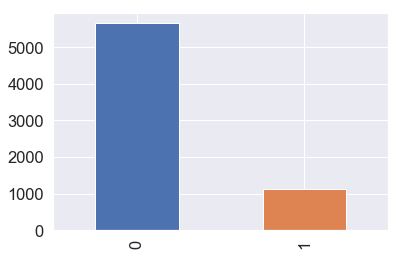

In [444]:
sephora3['vegan_label'].value_counts()[:20].plot(kind='bar') 

## Pie chart

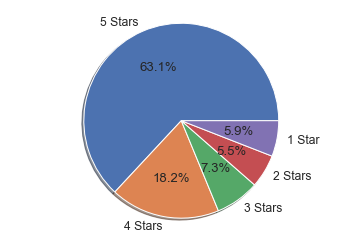

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

In [249]:
# pie chart of workers
labels = ['5 Stars', '4 Stars', '3 Stars', '2 Stars', '1 Star']
sizes = [sephora3['fiveStars'].sum(),
         sephora3['fourStars'].sum(),
         sephora3['threeStars'].sum(),
         sephora3['twoStars'].sum(),
         sephora3['oneStar'].sum()
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


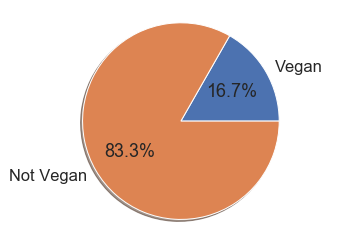

In [453]:
# pie chart of workers
labels = ['Vegan', 'Not Vegan']
sizes = [sephora3['vegan_label'].value_counts()[1],
         sephora3['vegan_label'].value_counts()[0]]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

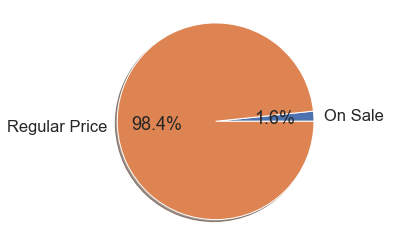

In [452]:
labels = ['On Sale', 'Regular Price']
sizes = [sephora3['on_sale_label'].value_counts()[1],
         sephora3['on_sale_label'].value_counts()[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [527]:
sephoraPlt = sephora3[sephora3.loves > 3]
#sephoraPlt = sephoraPlt[sephoraPlt.loves < 10]
sephoraPlt = sephoraPlt[sephoraPlt.reviews > 3]
#sephoraPlt = sephoraPlt[sephoraPlt.would_recommend != 0.0]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('nan')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Beauty Supplements')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Mini Size')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Makeup Palettes')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('High Tech Tools')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Shaving')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Hair Styling & Treatments')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Candles & Home Scents')]
sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Self Tanners')]
#sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Tools & Brushes')]
#sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Bath & Body')]
#sephoraPlt = sephoraPlt[sephoraPlt.product_type1 != ('Value & Gift Sets')]
print(sephoraPlt.shape)

(6027, 540)


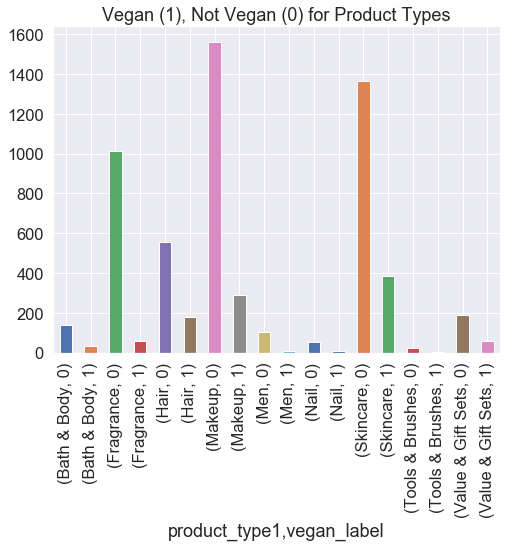

In [528]:
sephoraPlt.groupby(['product_type1','vegan_label'])['vegan_label'].count(
).plot.bar(title="Vegan (1), Not Vegan (0) for Product Types", figsize=(8,6))

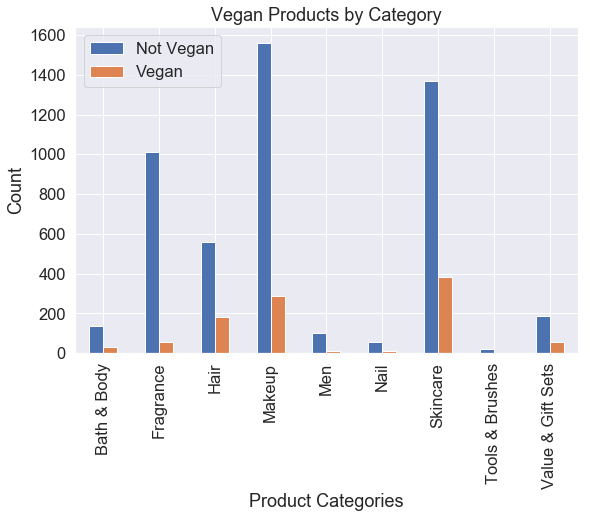

In [540]:
ax = pd.crosstab(sephoraPlt['product_type1'], 
            sephoraPlt['vegan_label']).plot.bar(title="Vegan Products by Category",
                                                figsize=(9,6))

ax.set_xlabel("Product Categories")
ax.set_ylabel("Count")
ax.legend(["Not Vegan", "Vegan"]);

Text(0, 0.5, 'Count')

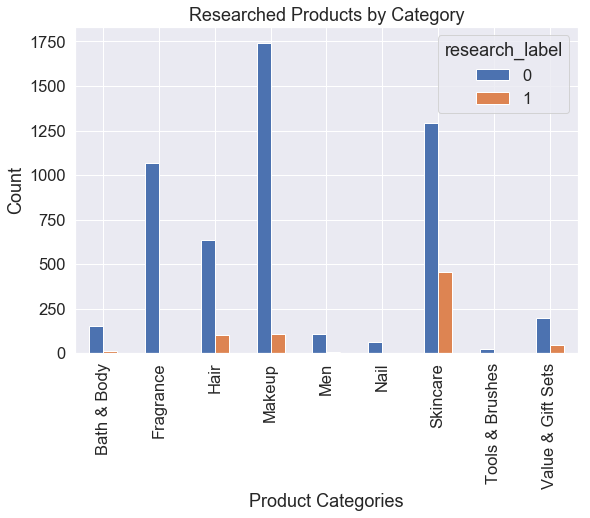

In [530]:
ax = pd.crosstab(sephoraPlt['product_type1'], 
            sephoraPlt['research_label']).plot.bar(title="Researched Products by Category",
                                                figsize=(9,6))

ax.set_xlabel("Product Categories")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

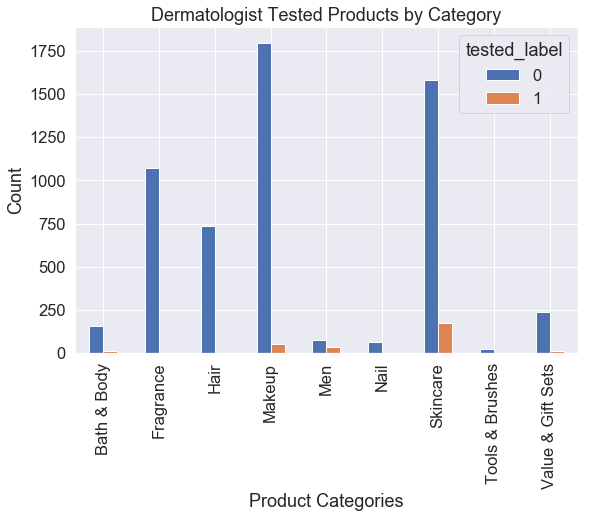

In [531]:
ax = pd.crosstab(sephoraPlt['product_type1'], 
            sephoraPlt['tested_label']).plot.bar(title="Dermatologist Tested Products by Category",
                                                figsize=(9,6))

ax.set_xlabel("Product Categories")
ax.set_ylabel("Count")

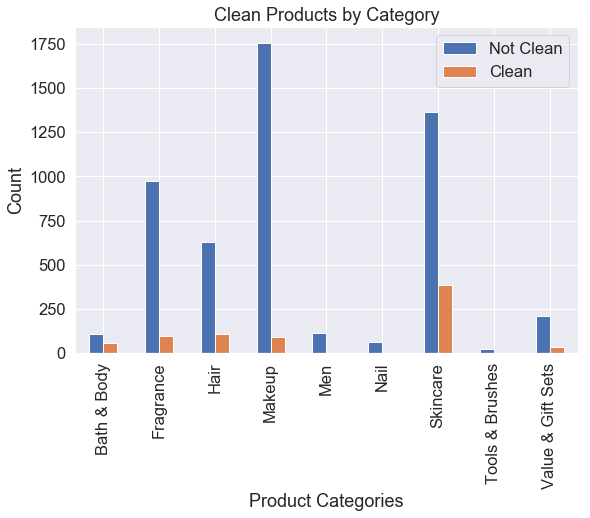

In [539]:
ax = pd.crosstab(sephoraPlt['product_type1'], 
            sephoraPlt['clean_label']).plot.bar(title="Clean Products by Category",
                                                figsize=(9,6))

ax.set_xlabel("Product Categories")
ax.set_ylabel("Count")
ax.legend(["Not Clean", "Clean"]);

In [533]:
sephoraPlt.shape

(6027, 540)

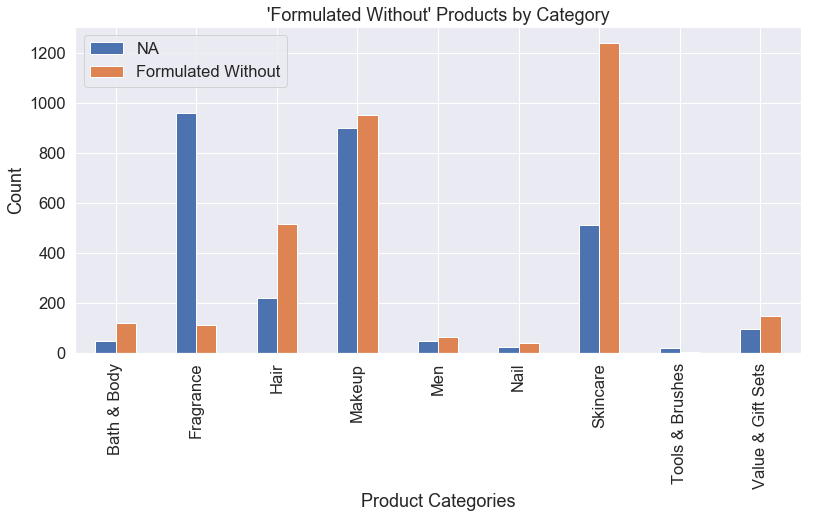

In [538]:
ax = pd.crosstab(sephoraPlt['product_type1'], 
            sephoraPlt['formulated_without_label']).plot.bar(title="'Formulated Without' Products by Category",
                                                figsize=(13,6))

ax.set_xlabel("Product Categories")
ax.set_ylabel("Count")
ax.legend(["NA", "Formulated Without"]);

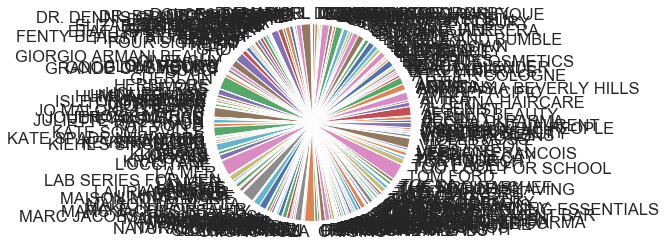

In [364]:
sums = sephoraPlt.price.groupby(sephora3.brand).sum()
fig1, ax1 = plt.subplots()
ax1.pie(sums, labels=sums.index)
ax1.axis('equal')
plt.show()

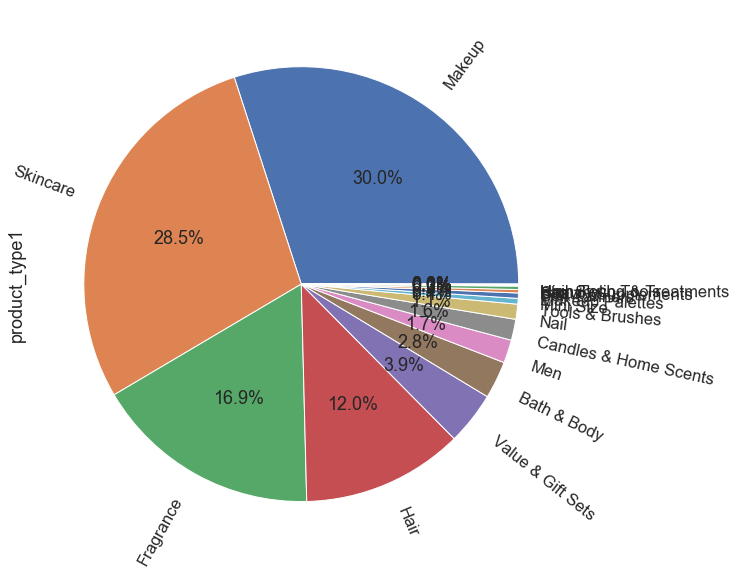

In [369]:
sephora3['product_type1'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10), rotatelabels=True)

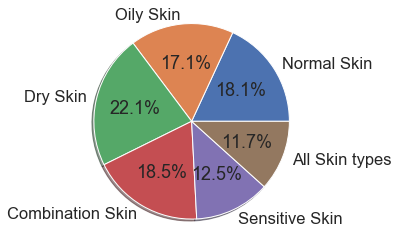

In [373]:
labels = ['Normal Skin', 'Oily Skin', 'Dry Skin', 'Combination Skin', 'Sensitive Skin', 'All Skin types']
sizes = [sephora3['val_normal_skin_label'].value_counts()[1],
         sephora3['oily_skin_label'].value_counts()[1],
         sephora3['dry_skin_label'].value_counts()[1],
         sephora3['combination_skin_label'].value_counts()[1],
         sephora3['sensitive_skin_label'].value_counts()[1],
         sephora3['all_skin_label'].value_counts()[1]
         ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [77]:
k = 15 #number of variables for heatmap
corrmat = sephora3.corr()

cols = corrmat.nlargest(k, 'rating')['rating'].index
print('HIGHEST CORRELATED:')
print(cols)

ls = corrmat.nsmallest(k, 'rating')['rating'].index
print('')
print('LOWEST CORRELATED:')
print(ls)

HIGHEST CORRELATED:
Index(['rating', 'product_type1__Fragrance', 'product_type2__Men',
       'product_type2__Cologne', 'product_type2__Value & Gift Sets', 'price',
       'product_type2__Women', 'product_type2__Perfume Gift Sets',
       'product_type1__Men', 'brand__CHANEL', 'size_ounces__0 ',
       'discounted_value_label', 'product_type2__Perfume',
       'product_type2__Brushes & Applicators', 'product_type2__Skincare'],
      dtype='object')

LOWEST CORRELATED:
Index(['would_recommend_label', 'would_recommend', 'product_type2__Eye Care',
       'formulated_without_label', 'product_type2__Eye Creams & Treatments',
       'product_type1__Hair', 'product_type2__Shampoo & Conditioner',
       'product_type2__Face', 'size_ounces__0.5 ', 'product_type1__Makeup',
       'index1', 'product_type2__Foundation', 'product_type2__Shampoo',
       'fiveStarsRatio', 'product_type2__Mascara'],
      dtype='object')


In [31]:
#sephora3 = pd.concat([sephNum, sephCat], axis = 1)

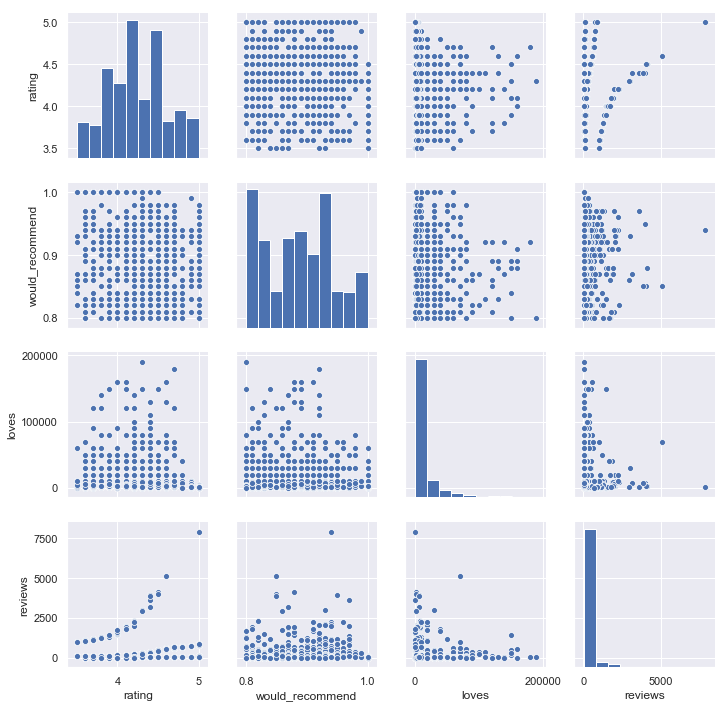

In [348]:
sns.set()
cols = ['rating', 'would_recommend', 'loves', 'reviews']

#'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 
# 'skin_type_label', 'vegan_label', 'tested_label', 'research_label', 'discounted_value_label', 'on_sale_label',
# 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label',  
# 'formulated_without_label', 'clean_label', 'Bath & Body', 'Beauty Supplements', 'Candles & Home Scents', 
# 'Fragrance', 'Gifts', 'Hair', 'Hair Styling & Treatments', 'High Tech Tools', 'Makeup', 
# 'Makeup Palettes', 'Men', 'Mini Size','Nail', 'Self Tanners', 'Shaving', 'Skincare',  'Tools & Brushes', 'Value & Gift Sets', 

sns.pairplot(sephoraPlt[cols], height = 2.5)
sns.set(font_scale=1.50)
plt.show()

<Figure size 1800x1872 with 0 Axes>

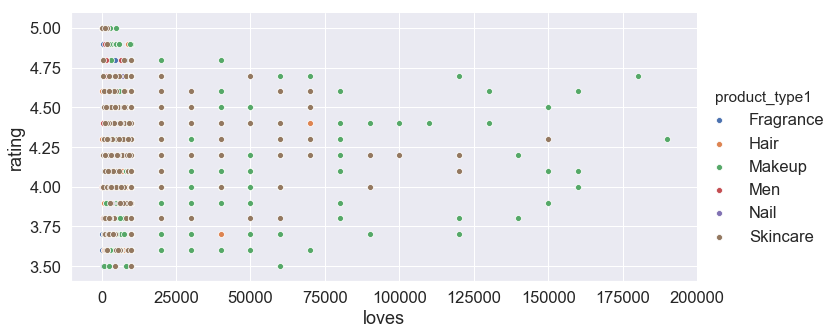

In [375]:
#sephoraPricePlt = sephora3[sephora3.reviews < 7500]
plt.figure(figsize=(25,26))
#plt.gcf().set_size_inches(11.7, 8.27)
sns.pairplot(x_vars=['loves'], y_vars=['rating'], data=sephoraPlt, hue="product_type1",
             size=5, aspect=48.7/24.27)

<Figure size 1800x1872 with 0 Axes>

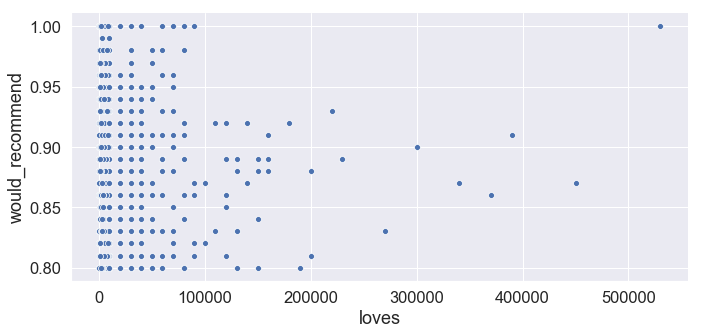

In [505]:
sephoraPlt1 = sephoraPlt[sephoraPlt.would_recommend != 0.0]

plt.figure(figsize=(25,26))
#plt.gcf().set_size_inches(11.7, 8.27)
sns.pairplot(x_vars=['loves'], y_vars=['would_recommend'], data=sephoraPlt1,
             size=5, aspect=48.7/24.27)

<Figure size 1800x1872 with 0 Axes>

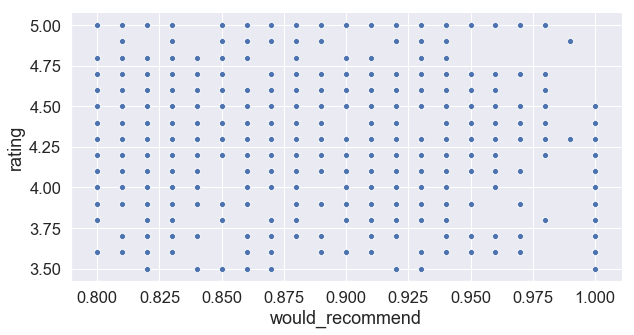

In [376]:
plt.figure(figsize=(25,26))
#plt.gcf().set_size_inches(11.7, 8.27)
sns.pairplot(x_vars=['would_recommend'], y_vars=['rating'], data=sephoraPlt,
            aspect=18.7/10.27, size=5)

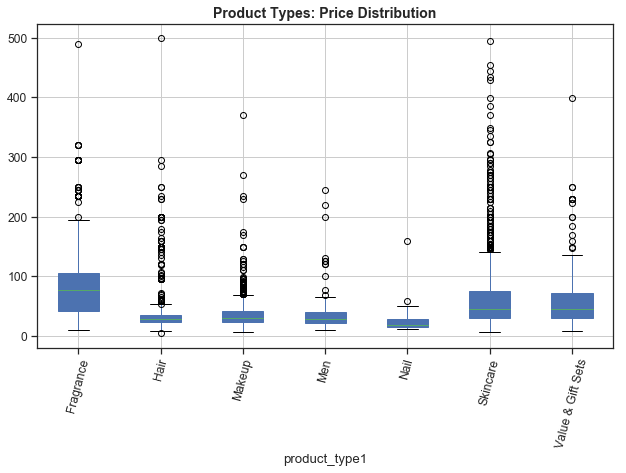

In [232]:
sephoraPlt.sort_values(by=['price'])

fig, ax = plt.subplots(figsize=(10,6))
sephoraPlt.boxplot(column=['price'], by='product_type1', ax=ax, patch_artist=True)
plt.xticks(rotation=75)
plt.suptitle("")
plt.title('Product Types: Price Distribution', weight='bold').set_fontsize('14')

In [240]:
sephoraPlt.columns

Index(['brand', 'product_name', 'og_price', 'price', 'size_ounces', 'loves',
       'product_type1', 'product_type2', 'product_type3', 'about',
       ...
       'formulated_without_label', 'clean_label', 'oneStarRatio',
       'twoStarsRatio', 'threeStarsRatio', 'fourStarsRatio', 'fiveStarsRatio',
       'fourAnd5StarRatio', 'fourAnd5StarRatio_rounded',
       'fourAnd5Star_above_below_avg'],
      dtype='object', length=1044)

In [247]:
#sephoraPlt = sephoraPlt[sephoraPlt.price > 0]

#sns.catplot(y="product_type1", x="price", data=sephoraPlt);

sns.boxplot(sephoraPlt['price'], by= ['product_type1'], data = sephoraPlt)

TypeError: cannot label index with a null key

### Rating correlations

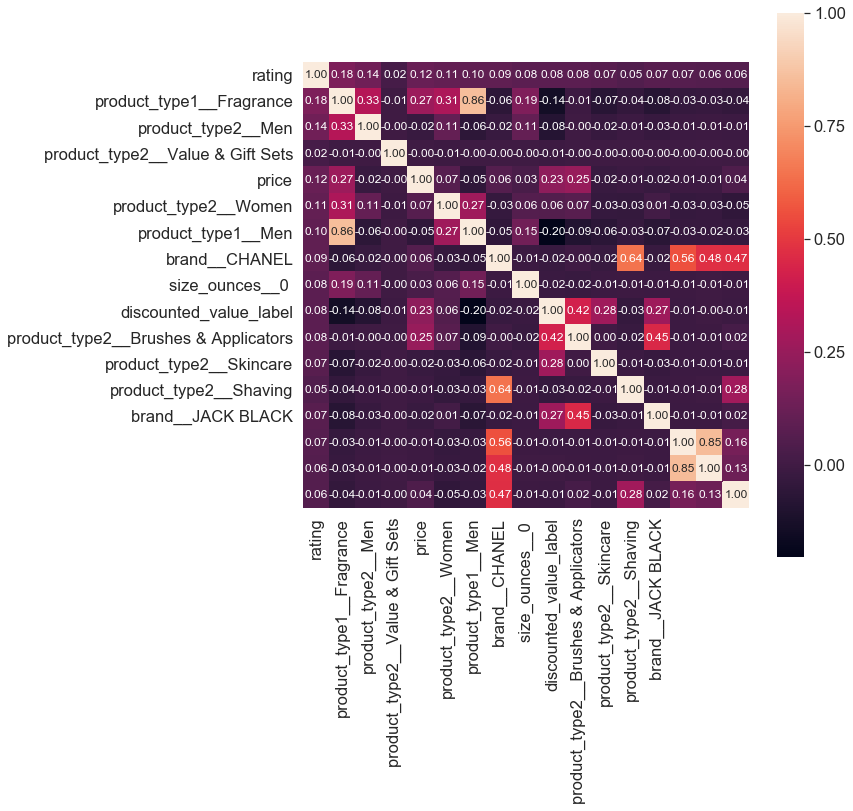

In [80]:
# WHICH VARIABLE ARE MOST CORRELATED WITH RATING

testing = sephora3[['fourAnd5Star_above_below_avg', 'price', 'size_ounces', 'loves', 'rating', 'would_recommend', 'reviews', 'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 'index1', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 
                    'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 
                    'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'size_ounces__ 0.1 ', 'size_ounces__ 0.118 ', 'size_ounces__ 0.12 ', 'size_ounces__ 0.13 ', 'size_ounces__ 0.14 ', 'size_ounces__ 0.16 ', 'size_ounces__ 0.19 ', 'size_ounces__ 0.2 ', 
                    'size_ounces__ 0.21 ', 'size_ounces__ 0.22 ', 'size_ounces__ 0.23 ', 'size_ounces__ 0.24 ', 'size_ounces__ 0.25 ', 'size_ounces__ 0.27 ', 'size_ounces__ 0.30 ', 'size_ounces__ 0.32 ', 'size_ounces__ 0.33 ', 'size_ounces__ 0.34 ', 'size_ounces__ 0.35 ', 'size_ounces__ 0.37 ', 'size_ounces__ 0.4 ', 'size_ounces__ 0.5 ', 'size_ounces__ 0.50 ', 'size_ounces__ 0.51 ', 'size_ounces__ 0.66 ', 'size_ounces__ 0.67 ', 'size_ounces__ 0.68 ', 'size_ounces__ 0.7 ', 'size_ounces__ 0.75 ', 'size_ounces__ 0.8 ', 'size_ounces__ 0.84 ', 'size_ounces__ 0.85 ', 'size_ounces__ 1 ', 'size_ounces__ 1.01 ', 'size_ounces__ 1.08 ', 'size_ounces__ 1.12 ', 'size_ounces__ 1.18 ', 'size_ounces__ 1.2 ', 'size_ounces__ 1.25 ', 'size_ounces__ 1.3 ', 'size_ounces__ 1.35 ', 'size_ounces__ 1.4 ', 'size_ounces__ 1.41 ', 'size_ounces__ 1.5 ', 'size_ounces__ 1.52 ', 'size_ounces__ 1.6 ', 'size_ounces__ 1.67 ', 'size_ounces__ 1.68 ', 'size_ounces__ 1.69', 'size_ounces__ 1.69 ', 'size_ounces__ 1.7 ', 'size_ounces__ 1.70 ', 'size_ounces__ 1.75 ', 'size_ounces__ 1.76 ', 'size_ounces__ 10 ', 'size_ounces__ 10.1 ', 'size_ounces__ 10.15 ', 'size_ounces__ 10.2 ', 'size_ounces__ 10.5 ', 
                    'size_ounces__ 10.6 ', 'size_ounces__ 10.8 ', 'size_ounces__ 12 ', 'size_ounces__ 13 ', 'size_ounces__ 13.4 ', 'size_ounces__ 13.5 ', 'size_ounces__ 14.1 ', 'size_ounces__ 16 ', 'size_ounces__ 16.5 ', 'size_ounces__ 16.9 ', 'size_ounces__ 2 ', 'size_ounces__ 2.1 ', 'size_ounces__ 2.2 ', 'size_ounces__ 2.3 ', 'size_ounces__ 2.4 ', 'size_ounces__ 2.5 ', 'size_ounces__ 2.53 ', 'size_ounces__ 2.54 ', 'size_ounces__ 2.6 ', 'size_ounces__ 2.7 ', 'size_ounces__ 2.8 ', 'size_ounces__ 3 ', 'size_ounces__ 3.1 ', 'size_ounces__ 3.2 ', 'size_ounces__ 3.3 ', 'size_ounces__ 3.33 ', 'size_ounces__ 3.38 ', 'size_ounces__ 3.4 ', 'size_ounces__ 3.5 ', 'size_ounces__ 3.6 ', 'size_ounces__ 3.7 ', 'size_ounces__ 3.8 ', 'size_ounces__ 32 ', 'size_ounces__ 4 ', 'size_ounces__ 4.0 ', 'size_ounces__ 4.1 ', 'size_ounces__ 4.2 ', 'size_ounces__ 4.3 ', 'size_ounces__ 4.4 ', 'size_ounces__ 4.5 ', 'size_ounces__ 4.7 ', 'size_ounces__ 4.75 ', 'size_ounces__ 5 ', 'size_ounces__ 5.07 ', 'size_ounces__ 5.1 ', 'size_ounces__ 5.2 ', 'size_ounces__ 5.3 ', 'size_ounces__ 5.4 ', 'size_ounces__ 5.41 ', 'size_ounces__ 5.5 ', 'size_ounces__ 5.9 ', 'size_ounces__ 6 ', 'size_ounces__ 6.2 ', 'size_ounces__ 6.3 ', 'size_ounces__ 6.5 ', 'size_ounces__ 6.7 ', 'size_ounces__ 6.75 ', 'size_ounces__ 6.8 ', 'size_ounces__ 6.9 ', 'size_ounces__ 7 ', 'size_ounces__ 7.0 ', 'size_ounces__ 7.1 ', 'size_ounces__ 7.3 ', 'size_ounces__ 7.5 ', 'size_ounces__ 7.7 ', 'size_ounces__ 8 ', 'size_ounces__ 8.1 ', 'size_ounces__ 8.2 ', 'size_ounces__ 8.33 ', 'size_ounces__ 8.4 ', 'size_ounces__ 8.45 ', 'size_ounces__ 8.5 ', 'size_ounces__ 9 ', 'size_ounces__ 9.3 ', 'size_ounces__.001 ', 'size_ounces__.004 ', 'size_ounces__.01 ', 'size_ounces__.016 ', 'size_ounces__.02 ', 'size_ounces__.03 ', 'size_ounces__.04 ', 'size_ounces__.041 ', 'size_ounces__.045 ', 'size_ounces__.056 ', 'size_ounces__.12 ', 'size_ounces__.15 ', 'size_ounces__.16 ', 'size_ounces__.17 ', 'size_ounces__.20 ', 'size_ounces__.23 ', 'size_ounces__.24 ', 'size_ounces__.25 ', 'size_ounces__.27', 'size_ounces__.27 ', 'size_ounces__.28 ', 'size_ounces__.31 ', 'size_ounces__.32 ', 
                    'size_ounces__.33', 'size_ounces__.33 ', 'size_ounces__.34', 'size_ounces__.35 ', 'size_ounces__.38 ', 'size_ounces__.42 ', 'size_ounces__.46 ', 'size_ounces__.49 ', 'size_ounces__.5 ', 'size_ounces__.50 ', 'size_ounces__.85 ', 'size_ounces__0 ', 'size_ounces__0.002 ', 'size_ounces__0.003 ', 'size_ounces__0.0038 ', 'size_ounces__0.004 ', 'size_ounces__0.005 ', 'size_ounces__0.0056 ', 'size_ounces__0.007 ', 'size_ounces__0.0088 ', 'size_ounces__0.009 ', 'size_ounces__0.01 ', 'size_ounces__0.012 ', 'size_ounces__0.016 ', 'size_ounces__0.017 ', 'size_ounces__0.0176 ', 'size_ounces__0.018 ', 'size_ounces__0.019 ', 'size_ounces__0.02 ', 'size_ounces__0.023 ', 'size_ounces__0.025 ', 'size_ounces__0.028 ', 'size_ounces__0.03 ', 'size_ounces__0.034 ', 'size_ounces__0.035 ', 'size_ounces__0.036 ', 'size_ounces__0.037 ', 'size_ounces__0.04 ', 'size_ounces__0.042 ', 'size_ounces__0.045 ', 'size_ounces__0.047 ', 'size_ounces__0.048 ', 'size_ounces__0.049 ', 'size_ounces__0.05 ', 'size_ounces__0.052 ', 'size_ounces__0.054 ', 'size_ounces__0.056 ', 'size_ounces__0.059 ', 'size_ounces__0.06 ', 'size_ounces__0.067 ', 'size_ounces__0.07 ', 'size_ounces__0.074 ', 'size_ounces__0.08 ', 'size_ounces__0.084 ', 'size_ounces__0.085 ', 'size_ounces__0.086 ', 'size_ounces__0.087 ', 'size_ounces__0.088 ', 'size_ounces__0.09 ', 'size_ounces__0.0915 ', 'size_ounces__0.096 ', 'size_ounces__0.1 ', 'size_ounces__0.10 ', 'size_ounces__0.105 ', 'size_ounces__0.106 ', 'size_ounces__0.11 ', 'size_ounces__0.118 ', 'size_ounces__0.12 ', 'size_ounces__0.123 ', 'size_ounces__0.13 ', 'size_ounces__0.134 ', 'size_ounces__0.135 ', 'size_ounces__0.139 ', 'size_ounces__0.14', 'size_ounces__0.14 ', 'size_ounces__0.141 ', 'size_ounces__0.15 ', 'size_ounces__0.153 ', 'size_ounces__0.16 ', 'size_ounces__0.169 ', 'size_ounces__0.17', 'size_ounces__0.17 ', 'size_ounces__0.18 ', 'size_ounces__0.19 ', 'size_ounces__0.192 ', 'size_ounces__0.2 ', 'size_ounces__0.20 ', 'size_ounces__0.208 ', 'size_ounces__0.21 ', 'size_ounces__0.22 ', 'size_ounces__0.23 ', 'size_ounces__0.24 ', 'size_ounces__0.247 ', 'size_ounces__0.25 ', 'size_ounces__0.26 ', 'size_ounces__0.264 ', 'size_ounces__0.27', 'size_ounces__0.27 ', 'size_ounces__0.28 ', 'size_ounces__0.282 ', 'size_ounces__0.29 ', 'size_ounces__0.3', 'size_ounces__0.3 ', 'size_ounces__0.30 ', 'size_ounces__0.31 ', 'size_ounces__0.32 ', 'size_ounces__0.33', 'size_ounces__0.33 ', 'size_ounces__0.34', 'size_ounces__0.34 ', 'size_ounces__0.35 ', 'size_ounces__0.36 ', 'size_ounces__0.37 ', 'size_ounces__0.38 ', 'size_ounces__0.39 ', 'size_ounces__0.4', 'size_ounces__0.4 ', 'size_ounces__0.40 ', 
                    'size_ounces__0.41 ', 'size_ounces__0.42 ', 'size_ounces__0.43 ', 'size_ounces__0.44 ', 'size_ounces__0.45 ', 'size_ounces__0.46 ', 'size_ounces__0.47 ', 'size_ounces__0.48 ', 'size_ounces__0.49', 'size_ounces__0.49 ', 'size_ounces__0.5 ', 'size_ounces__0.50 ', 'size_ounces__0.51 ', 'size_ounces__0.52 ', 'size_ounces__0.53 ', 'size_ounces__0.54 ', 'size_ounces__0.55 ', 'size_ounces__0.56 ', 'size_ounces__0.6 ', 'size_ounces__0.61 ', 'size_ounces__0.63 ', 'size_ounces__0.66 ', 'size_ounces__0.67', 'size_ounces__0.67 ', 'size_ounces__0.68 ', 'size_ounces__0.7 ', 'size_ounces__0.70 ', 'size_ounces__0.74 ', 'size_ounces__0.75 ', 'size_ounces__0.76 ', 'size_ounces__0.77 ', 'size_ounces__0.78 ', 'size_ounces__0.8 ', 'size_ounces__0.84 ', 'size_ounces__0.85 ', 'size_ounces__0.87 ', 'size_ounces__0.88 ', 'size_ounces__0.89 ', 'size_ounces__0.9', 'size_ounces__0.9 ', 'size_ounces__0.94 ', 'size_ounces__0.95 ', 'size_ounces__0.98 ', 'size_ounces__00.6 ', 'size_ounces__1', 'size_ounces__1 ', 'size_ounces__1.0 ', 'size_ounces__1.01 ', 'size_ounces__1.014 ', 'size_ounces__1.02 ', 'size_ounces__1.04 ', 'size_ounces__1.05 ', 'size_ounces__1.06 ', 'size_ounces__1.08 ', 'size_ounces__1.1 ', 'size_ounces__1.14 ', 'size_ounces__1.17 ', 'size_ounces__1.18 ', 'size_ounces__1.2 ', 'size_ounces__1.23 ', 'size_ounces__1.3 ', 'size_ounces__1.33 ', 'size_ounces__1.34 ', 'size_ounces__1.35 ', 'size_ounces__1.4 ', 'size_ounces__1.41 ', 'size_ounces__1.5 ', 'size_ounces__1.52 ', 'size_ounces__1.6', 'size_ounces__1.6 ', 'size_ounces__1.61 ', 'size_ounces__1.64 ', 'size_ounces__1.65 ', 'size_ounces__1.67 ', 'size_ounces__1.68 ', 'size_ounces__1.69', 'size_ounces__1.69 ', 'size_ounces__1.7', 'size_ounces__1.7 ', 'size_ounces__1.75 ', 'size_ounces__1.76 ', 'size_ounces__1.8', 'size_ounces__1.8 ', 'size_ounces__1.86 ', 'size_ounces__1.9 ', 'size_ounces__10 ', 'size_ounces__10.1 ', 'size_ounces__10.14 ', 'size_ounces__10.2 ', 'size_ounces__10.37 ', 'size_ounces__11 ', 'size_ounces__11.1 ', 'size_ounces__11.2 ', 'size_ounces__11.49 ', 'size_ounces__11.5 ', 'size_ounces__11.8 ', 'size_ounces__12 ', 'size_ounces__12.5 ', 'size_ounces__123 ', 'size_ounces__13.5 ', 'size_ounces__16 ', 'size_ounces__16.9 ', 'size_ounces__19 ', 'size_ounces__2', 'size_ounces__2 ', 'size_ounces__2.0 ', 'size_ounces__2.02 ', 'size_ounces__2.029 ', 'size_ounces__2.03 ', 'size_ounces__2.1 ', 'size_ounces__2.12 ', 'size_ounces__2.14 ', 'size_ounces__2.2 ', 'size_ounces__2.25 ', 'size_ounces__2.3 ', 'size_ounces__2.36 ', 'size_ounces__2.37 ', 'size_ounces__2.4 ', 'size_ounces__2.47 ', 'size_ounces__2.5', 'size_ounces__2.5 ', 'size_ounces__2.53 ', 'size_ounces__2.54', 'size_ounces__2.54 ', 
                    'size_ounces__2.6 ', 'size_ounces__2.65 ', 'size_ounces__2.7 ', 'size_ounces__2.70 ', 'size_ounces__2.75 ', 'size_ounces__2.8 ', 'size_ounces__2.82 ', 'size_ounces__2.87 ', 'size_ounces__21.1 ', 'size_ounces__22 ', 'size_ounces__3 ', 'size_ounces__3.0 ', 'size_ounces__3.04 ', 'size_ounces__3.17 ', 'size_ounces__3.2 ', 'size_ounces__3.3 ', 'size_ounces__3.38 ', 'size_ounces__3.39 ', 'size_ounces__3.4', 'size_ounces__3.4 ', 'size_ounces__3.5 ', 'size_ounces__3.52 ', 'size_ounces__3.53 ', 'size_ounces__3.6 ', 'size_ounces__3.65 ', 'size_ounces__3.75 ', 'size_ounces__3.8 ', 'size_ounces__3.9 ', 'size_ounces__32 ', 'size_ounces__4', 'size_ounces__4 ', 'size_ounces__4.0 ', 'size_ounces__4.05 ',
                    'size_ounces__4.08 ', 'size_ounces__4.1 ', 'size_ounces__4.2 ', 'size_ounces__4.22 ', 'size_ounces__4.25 ', 'size_ounces__4.3 ', 'size_ounces__4.35 ', 'size_ounces__4.39 ', 'size_ounces__4.4 ', 'size_ounces__4.5 ', 'size_ounces__4.6 ', 'size_ounces__4.7 ', 'size_ounces__4.73 ', 'size_ounces__4.75 ', 'size_ounces__4.8 ', 'size_ounces__4.9 ', 'size_ounces__5 ', 'size_ounces__5.0 ', 'size_ounces__5.06 ', 'size_ounces__5.07 ', 'size_ounces__5.1 ', 'size_ounces__5.2 ', 'size_ounces__5.25 ', 'size_ounces__5.29 ', 'size_ounces__5.3 ', 'size_ounces__5.4 ', 'size_ounces__5.5 ', 'size_ounces__5.6 ', 'size_ounces__5.7 ', 'size_ounces__5.8 ', 'size_ounces__5.82 ', 'size_ounces__5.9', 'size_ounces__5.9 ', 'size_ounces__5.99 ', 'size_ounces__6 ', 'size_ounces__6.1 ', 'size_ounces__6.17 ', 'size_ounces__6.2', 'size_ounces__6.25 ', 'size_ounces__6.3 ', 'size_ounces__6.4 ', 'size_ounces__6.5', 'size_ounces__6.5 ', 'size_ounces__6.59 ', 'size_ounces__6.6 ', 'size_ounces__6.7 ', 'size_ounces__6.75 ', 'size_ounces__6.76 ', 'size_ounces__6.8 ', 'size_ounces__6.9 ', 'size_ounces__7 ', 'size_ounces__7.0 ', 'size_ounces__7.05 ', 'size_ounces__7.1 ', 'size_ounces__7.2 ', 'size_ounces__7.5 ', 'size_ounces__7.6 ', 'size_ounces__7.7 ', 'size_ounces__7.75 ', 'size_ounces__8 ', 'size_ounces__8.1', 'size_ounces__8.1 ', 'size_ounces__8.2 ', 'size_ounces__8.3 ', 'size_ounces__8.33 ', 'size_ounces__8.4 ', 'size_ounces__8.45 ', 'size_ounces__8.5 ', 'size_ounces__8.8 ', 'size_ounces__8.9 ', 'size_ounces__9 ', 'size_ounces__9.3 ', 'size_ounces__9.9 ', 'would_recommend_label', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'skin_type_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label']]  

plt.figure(figsize=(10, 10))
corrmat = testing.corr()
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'rating')['rating'].index
cm = np.corrcoef(testing[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sephora3.corr()

### Loves correlations

<Figure size 576x360 with 0 Axes>

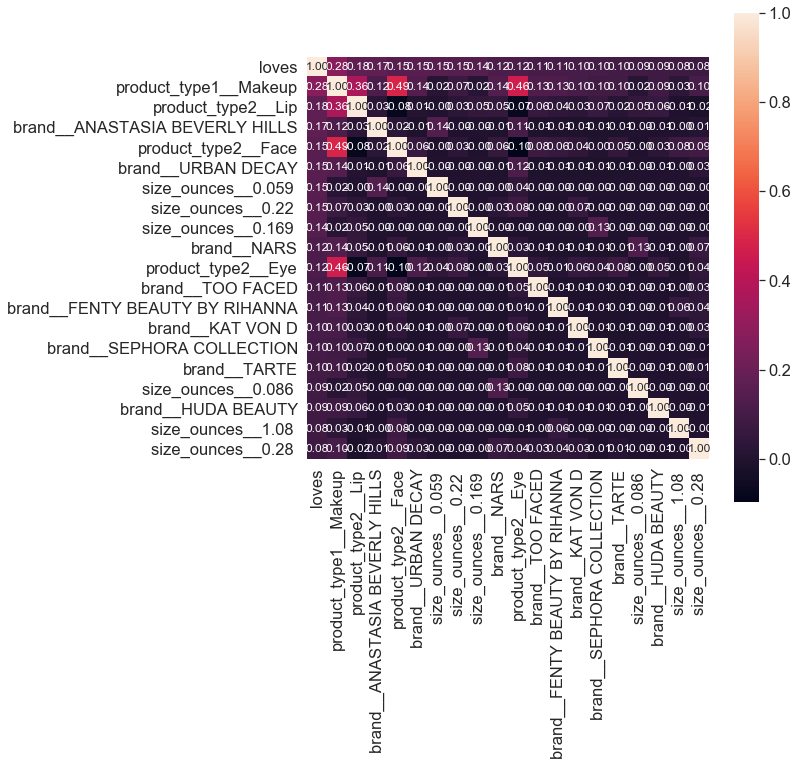

In [83]:
# WHICH VARIABLE ARE MOST CORRELATED WITH LOVES
plt.figure(figsize=(8,5))

testing = sephora3[['fourAnd5Star_above_below_avg', 'price', 'size_ounces', 'loves', 'rating', 'would_recommend', 'reviews', 'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 'index1', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 
                    'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 
                    'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'size_ounces__ 0.1 ', 'size_ounces__ 0.118 ', 'size_ounces__ 0.12 ', 'size_ounces__ 0.13 ', 'size_ounces__ 0.14 ', 'size_ounces__ 0.16 ', 'size_ounces__ 0.19 ', 'size_ounces__ 0.2 ', 
                    'size_ounces__ 0.21 ', 'size_ounces__ 0.22 ', 'size_ounces__ 0.23 ', 'size_ounces__ 0.24 ', 'size_ounces__ 0.25 ', 'size_ounces__ 0.27 ', 'size_ounces__ 0.30 ', 'size_ounces__ 0.32 ', 'size_ounces__ 0.33 ', 'size_ounces__ 0.34 ', 'size_ounces__ 0.35 ', 'size_ounces__ 0.37 ', 'size_ounces__ 0.4 ', 'size_ounces__ 0.5 ', 'size_ounces__ 0.50 ', 'size_ounces__ 0.51 ', 'size_ounces__ 0.66 ', 'size_ounces__ 0.67 ', 'size_ounces__ 0.68 ', 'size_ounces__ 0.7 ', 'size_ounces__ 0.75 ', 'size_ounces__ 0.8 ', 'size_ounces__ 0.84 ', 'size_ounces__ 0.85 ', 'size_ounces__ 1 ', 'size_ounces__ 1.01 ', 'size_ounces__ 1.08 ', 'size_ounces__ 1.12 ', 'size_ounces__ 1.18 ', 'size_ounces__ 1.2 ', 'size_ounces__ 1.25 ', 'size_ounces__ 1.3 ', 'size_ounces__ 1.35 ', 'size_ounces__ 1.4 ', 'size_ounces__ 1.41 ', 'size_ounces__ 1.5 ', 'size_ounces__ 1.52 ', 'size_ounces__ 1.6 ', 'size_ounces__ 1.67 ', 'size_ounces__ 1.68 ', 'size_ounces__ 1.69', 'size_ounces__ 1.69 ', 'size_ounces__ 1.7 ', 'size_ounces__ 1.70 ', 'size_ounces__ 1.75 ', 'size_ounces__ 1.76 ', 'size_ounces__ 10 ', 'size_ounces__ 10.1 ', 'size_ounces__ 10.15 ', 'size_ounces__ 10.2 ', 'size_ounces__ 10.5 ', 
                    'size_ounces__ 10.6 ', 'size_ounces__ 10.8 ', 'size_ounces__ 12 ', 'size_ounces__ 13 ', 'size_ounces__ 13.4 ', 'size_ounces__ 13.5 ', 'size_ounces__ 14.1 ', 'size_ounces__ 16 ', 'size_ounces__ 16.5 ', 'size_ounces__ 16.9 ', 'size_ounces__ 2 ', 'size_ounces__ 2.1 ', 'size_ounces__ 2.2 ', 'size_ounces__ 2.3 ', 'size_ounces__ 2.4 ', 'size_ounces__ 2.5 ', 'size_ounces__ 2.53 ', 'size_ounces__ 2.54 ', 'size_ounces__ 2.6 ', 'size_ounces__ 2.7 ', 'size_ounces__ 2.8 ', 'size_ounces__ 3 ', 'size_ounces__ 3.1 ', 'size_ounces__ 3.2 ', 'size_ounces__ 3.3 ', 'size_ounces__ 3.33 ', 'size_ounces__ 3.38 ', 'size_ounces__ 3.4 ', 'size_ounces__ 3.5 ', 'size_ounces__ 3.6 ', 'size_ounces__ 3.7 ', 'size_ounces__ 3.8 ', 'size_ounces__ 32 ', 'size_ounces__ 4 ', 'size_ounces__ 4.0 ', 'size_ounces__ 4.1 ', 'size_ounces__ 4.2 ', 'size_ounces__ 4.3 ', 'size_ounces__ 4.4 ', 'size_ounces__ 4.5 ', 'size_ounces__ 4.7 ', 'size_ounces__ 4.75 ', 'size_ounces__ 5 ', 'size_ounces__ 5.07 ', 'size_ounces__ 5.1 ', 'size_ounces__ 5.2 ', 'size_ounces__ 5.3 ', 'size_ounces__ 5.4 ', 'size_ounces__ 5.41 ', 'size_ounces__ 5.5 ', 'size_ounces__ 5.9 ', 'size_ounces__ 6 ', 'size_ounces__ 6.2 ', 'size_ounces__ 6.3 ', 'size_ounces__ 6.5 ', 'size_ounces__ 6.7 ', 'size_ounces__ 6.75 ', 'size_ounces__ 6.8 ', 'size_ounces__ 6.9 ', 'size_ounces__ 7 ', 'size_ounces__ 7.0 ', 'size_ounces__ 7.1 ', 'size_ounces__ 7.3 ', 'size_ounces__ 7.5 ', 'size_ounces__ 7.7 ', 'size_ounces__ 8 ', 'size_ounces__ 8.1 ', 'size_ounces__ 8.2 ', 'size_ounces__ 8.33 ', 'size_ounces__ 8.4 ', 'size_ounces__ 8.45 ', 'size_ounces__ 8.5 ', 'size_ounces__ 9 ', 'size_ounces__ 9.3 ', 'size_ounces__.001 ', 'size_ounces__.004 ', 'size_ounces__.01 ', 'size_ounces__.016 ', 'size_ounces__.02 ', 'size_ounces__.03 ', 'size_ounces__.04 ', 'size_ounces__.041 ', 'size_ounces__.045 ', 'size_ounces__.056 ', 'size_ounces__.12 ', 'size_ounces__.15 ', 'size_ounces__.16 ', 'size_ounces__.17 ', 'size_ounces__.20 ', 'size_ounces__.23 ', 'size_ounces__.24 ', 'size_ounces__.25 ', 'size_ounces__.27', 'size_ounces__.27 ', 'size_ounces__.28 ', 'size_ounces__.31 ', 'size_ounces__.32 ', 
                    'size_ounces__.33', 'size_ounces__.33 ', 'size_ounces__.34', 'size_ounces__.35 ', 'size_ounces__.38 ', 'size_ounces__.42 ', 'size_ounces__.46 ', 'size_ounces__.49 ', 'size_ounces__.5 ', 'size_ounces__.50 ', 'size_ounces__.85 ', 'size_ounces__0 ', 'size_ounces__0.002 ', 'size_ounces__0.003 ', 'size_ounces__0.0038 ', 'size_ounces__0.004 ', 'size_ounces__0.005 ', 'size_ounces__0.0056 ', 'size_ounces__0.007 ', 'size_ounces__0.0088 ', 'size_ounces__0.009 ', 'size_ounces__0.01 ', 'size_ounces__0.012 ', 'size_ounces__0.016 ', 'size_ounces__0.017 ', 'size_ounces__0.0176 ', 'size_ounces__0.018 ', 'size_ounces__0.019 ', 'size_ounces__0.02 ', 'size_ounces__0.023 ', 'size_ounces__0.025 ', 'size_ounces__0.028 ', 'size_ounces__0.03 ', 'size_ounces__0.034 ', 'size_ounces__0.035 ', 'size_ounces__0.036 ', 'size_ounces__0.037 ', 'size_ounces__0.04 ', 'size_ounces__0.042 ', 'size_ounces__0.045 ', 'size_ounces__0.047 ', 'size_ounces__0.048 ', 'size_ounces__0.049 ', 'size_ounces__0.05 ', 'size_ounces__0.052 ', 'size_ounces__0.054 ', 'size_ounces__0.056 ', 'size_ounces__0.059 ', 'size_ounces__0.06 ', 'size_ounces__0.067 ', 'size_ounces__0.07 ', 'size_ounces__0.074 ', 'size_ounces__0.08 ', 'size_ounces__0.084 ', 'size_ounces__0.085 ', 'size_ounces__0.086 ', 'size_ounces__0.087 ', 'size_ounces__0.088 ', 'size_ounces__0.09 ', 'size_ounces__0.0915 ', 'size_ounces__0.096 ', 'size_ounces__0.1 ', 'size_ounces__0.10 ', 'size_ounces__0.105 ', 'size_ounces__0.106 ', 'size_ounces__0.11 ', 'size_ounces__0.118 ', 'size_ounces__0.12 ', 'size_ounces__0.123 ', 'size_ounces__0.13 ', 'size_ounces__0.134 ', 'size_ounces__0.135 ', 'size_ounces__0.139 ', 'size_ounces__0.14', 'size_ounces__0.14 ', 'size_ounces__0.141 ', 'size_ounces__0.15 ', 'size_ounces__0.153 ', 'size_ounces__0.16 ', 'size_ounces__0.169 ', 'size_ounces__0.17', 'size_ounces__0.17 ', 'size_ounces__0.18 ', 'size_ounces__0.19 ', 'size_ounces__0.192 ', 'size_ounces__0.2 ', 'size_ounces__0.20 ', 'size_ounces__0.208 ', 'size_ounces__0.21 ', 'size_ounces__0.22 ', 'size_ounces__0.23 ', 'size_ounces__0.24 ', 'size_ounces__0.247 ', 'size_ounces__0.25 ', 'size_ounces__0.26 ', 'size_ounces__0.264 ', 'size_ounces__0.27', 'size_ounces__0.27 ', 'size_ounces__0.28 ', 'size_ounces__0.282 ', 'size_ounces__0.29 ', 'size_ounces__0.3', 'size_ounces__0.3 ', 'size_ounces__0.30 ', 'size_ounces__0.31 ', 'size_ounces__0.32 ', 'size_ounces__0.33', 'size_ounces__0.33 ', 'size_ounces__0.34', 'size_ounces__0.34 ', 'size_ounces__0.35 ', 'size_ounces__0.36 ', 'size_ounces__0.37 ', 'size_ounces__0.38 ', 'size_ounces__0.39 ', 'size_ounces__0.4', 'size_ounces__0.4 ', 'size_ounces__0.40 ', 
                    'size_ounces__0.41 ', 'size_ounces__0.42 ', 'size_ounces__0.43 ', 'size_ounces__0.44 ', 'size_ounces__0.45 ', 'size_ounces__0.46 ', 'size_ounces__0.47 ', 'size_ounces__0.48 ', 'size_ounces__0.49', 'size_ounces__0.49 ', 'size_ounces__0.5 ', 'size_ounces__0.50 ', 'size_ounces__0.51 ', 'size_ounces__0.52 ', 'size_ounces__0.53 ', 'size_ounces__0.54 ', 'size_ounces__0.55 ', 'size_ounces__0.56 ', 'size_ounces__0.6 ', 'size_ounces__0.61 ', 'size_ounces__0.63 ', 'size_ounces__0.66 ', 'size_ounces__0.67', 'size_ounces__0.67 ', 'size_ounces__0.68 ', 'size_ounces__0.7 ', 'size_ounces__0.70 ', 'size_ounces__0.74 ', 'size_ounces__0.75 ', 'size_ounces__0.76 ', 'size_ounces__0.77 ', 'size_ounces__0.78 ', 'size_ounces__0.8 ', 'size_ounces__0.84 ', 'size_ounces__0.85 ', 'size_ounces__0.87 ', 'size_ounces__0.88 ', 'size_ounces__0.89 ', 'size_ounces__0.9', 'size_ounces__0.9 ', 'size_ounces__0.94 ', 'size_ounces__0.95 ', 'size_ounces__0.98 ', 'size_ounces__00.6 ', 'size_ounces__1', 'size_ounces__1 ', 'size_ounces__1.0 ', 'size_ounces__1.01 ', 'size_ounces__1.014 ', 'size_ounces__1.02 ', 'size_ounces__1.04 ', 'size_ounces__1.05 ', 'size_ounces__1.06 ', 'size_ounces__1.08 ', 'size_ounces__1.1 ', 'size_ounces__1.14 ', 'size_ounces__1.17 ', 'size_ounces__1.18 ', 'size_ounces__1.2 ', 'size_ounces__1.23 ', 'size_ounces__1.3 ', 'size_ounces__1.33 ', 'size_ounces__1.34 ', 'size_ounces__1.35 ', 'size_ounces__1.4 ', 'size_ounces__1.41 ', 'size_ounces__1.5 ', 'size_ounces__1.52 ', 'size_ounces__1.6', 'size_ounces__1.6 ', 'size_ounces__1.61 ', 'size_ounces__1.64 ', 'size_ounces__1.65 ', 'size_ounces__1.67 ', 'size_ounces__1.68 ', 'size_ounces__1.69', 'size_ounces__1.69 ', 'size_ounces__1.7', 'size_ounces__1.7 ', 'size_ounces__1.75 ', 'size_ounces__1.76 ', 'size_ounces__1.8', 'size_ounces__1.8 ', 'size_ounces__1.86 ', 'size_ounces__1.9 ', 'size_ounces__10 ', 'size_ounces__10.1 ', 'size_ounces__10.14 ', 'size_ounces__10.2 ', 'size_ounces__10.37 ', 'size_ounces__11 ', 'size_ounces__11.1 ', 'size_ounces__11.2 ', 'size_ounces__11.49 ', 'size_ounces__11.5 ', 'size_ounces__11.8 ', 'size_ounces__12 ', 'size_ounces__12.5 ', 'size_ounces__123 ', 'size_ounces__13.5 ', 'size_ounces__16 ', 'size_ounces__16.9 ', 'size_ounces__19 ', 'size_ounces__2', 'size_ounces__2 ', 'size_ounces__2.0 ', 'size_ounces__2.02 ', 'size_ounces__2.029 ', 'size_ounces__2.03 ', 'size_ounces__2.1 ', 'size_ounces__2.12 ', 'size_ounces__2.14 ', 'size_ounces__2.2 ', 'size_ounces__2.25 ', 'size_ounces__2.3 ', 'size_ounces__2.36 ', 'size_ounces__2.37 ', 'size_ounces__2.4 ', 'size_ounces__2.47 ', 'size_ounces__2.5', 'size_ounces__2.5 ', 'size_ounces__2.53 ', 'size_ounces__2.54', 'size_ounces__2.54 ', 
                    'size_ounces__2.6 ', 'size_ounces__2.65 ', 'size_ounces__2.7 ', 'size_ounces__2.70 ', 'size_ounces__2.75 ', 'size_ounces__2.8 ', 'size_ounces__2.82 ', 'size_ounces__2.87 ', 'size_ounces__21.1 ', 'size_ounces__22 ', 'size_ounces__3 ', 'size_ounces__3.0 ', 'size_ounces__3.04 ', 'size_ounces__3.17 ', 'size_ounces__3.2 ', 'size_ounces__3.3 ', 'size_ounces__3.38 ', 'size_ounces__3.39 ', 'size_ounces__3.4', 'size_ounces__3.4 ', 'size_ounces__3.5 ', 'size_ounces__3.52 ', 'size_ounces__3.53 ', 'size_ounces__3.6 ', 'size_ounces__3.65 ', 'size_ounces__3.75 ', 'size_ounces__3.8 ', 'size_ounces__3.9 ', 'size_ounces__32 ', 'size_ounces__4', 'size_ounces__4 ', 'size_ounces__4.0 ', 'size_ounces__4.05 ',
                    'size_ounces__4.08 ', 'size_ounces__4.1 ', 'size_ounces__4.2 ', 'size_ounces__4.22 ', 'size_ounces__4.25 ', 'size_ounces__4.3 ', 'size_ounces__4.35 ', 'size_ounces__4.39 ', 'size_ounces__4.4 ', 'size_ounces__4.5 ', 'size_ounces__4.6 ', 'size_ounces__4.7 ', 'size_ounces__4.73 ', 'size_ounces__4.75 ', 'size_ounces__4.8 ', 'size_ounces__4.9 ', 'size_ounces__5 ', 'size_ounces__5.0 ', 'size_ounces__5.06 ', 'size_ounces__5.07 ', 'size_ounces__5.1 ', 'size_ounces__5.2 ', 'size_ounces__5.25 ', 'size_ounces__5.29 ', 'size_ounces__5.3 ', 'size_ounces__5.4 ', 'size_ounces__5.5 ', 'size_ounces__5.6 ', 'size_ounces__5.7 ', 'size_ounces__5.8 ', 'size_ounces__5.82 ', 'size_ounces__5.9', 'size_ounces__5.9 ', 'size_ounces__5.99 ', 'size_ounces__6 ', 'size_ounces__6.1 ', 'size_ounces__6.17 ', 'size_ounces__6.2', 'size_ounces__6.25 ', 'size_ounces__6.3 ', 'size_ounces__6.4 ', 'size_ounces__6.5', 'size_ounces__6.5 ', 'size_ounces__6.59 ', 'size_ounces__6.6 ', 'size_ounces__6.7 ', 'size_ounces__6.75 ', 'size_ounces__6.76 ', 'size_ounces__6.8 ', 'size_ounces__6.9 ', 'size_ounces__7 ', 'size_ounces__7.0 ', 'size_ounces__7.05 ', 'size_ounces__7.1 ', 'size_ounces__7.2 ', 'size_ounces__7.5 ', 'size_ounces__7.6 ', 'size_ounces__7.7 ', 'size_ounces__7.75 ', 'size_ounces__8 ', 'size_ounces__8.1', 'size_ounces__8.1 ', 'size_ounces__8.2 ', 'size_ounces__8.3 ', 'size_ounces__8.33 ', 'size_ounces__8.4 ', 'size_ounces__8.45 ', 'size_ounces__8.5 ', 'size_ounces__8.8 ', 'size_ounces__8.9 ', 'size_ounces__9 ', 'size_ounces__9.3 ', 'size_ounces__9.9 ', 'would_recommend_label', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'skin_type_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label']]  

plt.figure(figsize=(9,9))
corrmat = testing.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'loves')['loves'].index
cm = np.corrcoef(testing[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Price correlations

<Figure size 576x360 with 0 Axes>

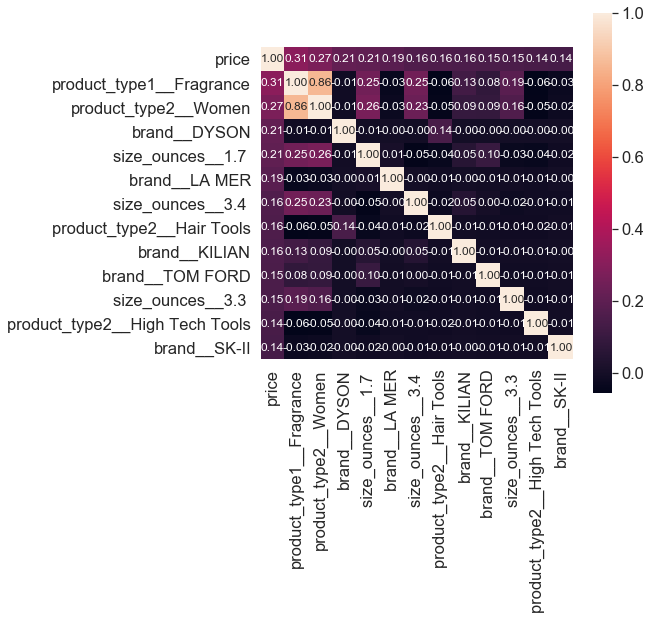

In [82]:
# WHICH VARIABLE ARE MOST CORRELATED WITH SALEPRICE 
plt.figure(figsize=(8,5))
testing = sephora3[['fourAnd5Star_above_below_avg', 'price', 'brand', 'product_name', 'og_price', 'size_ounces', 'loves', 'product_type1', 'product_type2', 'product_type3', 'about', 'rating', 'would_recommend', 'reviews', 'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 'index1', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 
                    'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 
                    'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'size_ounces__ 0.1 ', 'size_ounces__ 0.118 ', 'size_ounces__ 0.12 ', 'size_ounces__ 0.13 ', 'size_ounces__ 0.14 ', 'size_ounces__ 0.16 ', 'size_ounces__ 0.19 ', 'size_ounces__ 0.2 ', 
                    'size_ounces__ 0.21 ', 'size_ounces__ 0.22 ', 'size_ounces__ 0.23 ', 'size_ounces__ 0.24 ', 'size_ounces__ 0.25 ', 'size_ounces__ 0.27 ', 'size_ounces__ 0.30 ', 'size_ounces__ 0.32 ', 'size_ounces__ 0.33 ', 'size_ounces__ 0.34 ', 'size_ounces__ 0.35 ', 'size_ounces__ 0.37 ', 'size_ounces__ 0.4 ', 'size_ounces__ 0.5 ', 'size_ounces__ 0.50 ', 'size_ounces__ 0.51 ', 'size_ounces__ 0.66 ', 'size_ounces__ 0.67 ', 'size_ounces__ 0.68 ', 'size_ounces__ 0.7 ', 'size_ounces__ 0.75 ', 'size_ounces__ 0.8 ', 'size_ounces__ 0.84 ', 'size_ounces__ 0.85 ', 'size_ounces__ 1 ', 'size_ounces__ 1.01 ', 'size_ounces__ 1.08 ', 'size_ounces__ 1.12 ', 'size_ounces__ 1.18 ', 'size_ounces__ 1.2 ', 'size_ounces__ 1.25 ', 'size_ounces__ 1.3 ', 'size_ounces__ 1.35 ', 'size_ounces__ 1.4 ', 'size_ounces__ 1.41 ', 'size_ounces__ 1.5 ', 'size_ounces__ 1.52 ', 'size_ounces__ 1.6 ', 'size_ounces__ 1.67 ', 'size_ounces__ 1.68 ', 'size_ounces__ 1.69', 'size_ounces__ 1.69 ', 'size_ounces__ 1.7 ', 'size_ounces__ 1.70 ', 'size_ounces__ 1.75 ', 'size_ounces__ 1.76 ', 'size_ounces__ 10 ', 'size_ounces__ 10.1 ', 'size_ounces__ 10.15 ', 'size_ounces__ 10.2 ', 'size_ounces__ 10.5 ', 
                    'size_ounces__ 10.6 ', 'size_ounces__ 10.8 ', 'size_ounces__ 12 ', 'size_ounces__ 13 ', 'size_ounces__ 13.4 ', 'size_ounces__ 13.5 ', 'size_ounces__ 14.1 ', 'size_ounces__ 16 ', 'size_ounces__ 16.5 ', 'size_ounces__ 16.9 ', 'size_ounces__ 2 ', 'size_ounces__ 2.1 ', 'size_ounces__ 2.2 ', 'size_ounces__ 2.3 ', 'size_ounces__ 2.4 ', 'size_ounces__ 2.5 ', 'size_ounces__ 2.53 ', 'size_ounces__ 2.54 ', 'size_ounces__ 2.6 ', 'size_ounces__ 2.7 ', 'size_ounces__ 2.8 ', 'size_ounces__ 3 ', 'size_ounces__ 3.1 ', 'size_ounces__ 3.2 ', 'size_ounces__ 3.3 ', 'size_ounces__ 3.33 ', 'size_ounces__ 3.38 ', 'size_ounces__ 3.4 ', 'size_ounces__ 3.5 ', 'size_ounces__ 3.6 ', 'size_ounces__ 3.7 ', 'size_ounces__ 3.8 ', 'size_ounces__ 32 ', 'size_ounces__ 4 ', 'size_ounces__ 4.0 ', 'size_ounces__ 4.1 ', 'size_ounces__ 4.2 ', 'size_ounces__ 4.3 ', 'size_ounces__ 4.4 ', 'size_ounces__ 4.5 ', 'size_ounces__ 4.7 ', 'size_ounces__ 4.75 ', 'size_ounces__ 5 ', 'size_ounces__ 5.07 ', 'size_ounces__ 5.1 ', 'size_ounces__ 5.2 ', 'size_ounces__ 5.3 ', 'size_ounces__ 5.4 ', 'size_ounces__ 5.41 ', 'size_ounces__ 5.5 ', 'size_ounces__ 5.9 ', 'size_ounces__ 6 ', 'size_ounces__ 6.2 ', 'size_ounces__ 6.3 ', 'size_ounces__ 6.5 ', 'size_ounces__ 6.7 ', 'size_ounces__ 6.75 ', 'size_ounces__ 6.8 ', 'size_ounces__ 6.9 ', 'size_ounces__ 7 ', 'size_ounces__ 7.0 ', 'size_ounces__ 7.1 ', 'size_ounces__ 7.3 ', 'size_ounces__ 7.5 ', 'size_ounces__ 7.7 ', 'size_ounces__ 8 ', 'size_ounces__ 8.1 ', 'size_ounces__ 8.2 ', 'size_ounces__ 8.33 ', 'size_ounces__ 8.4 ', 'size_ounces__ 8.45 ', 'size_ounces__ 8.5 ', 'size_ounces__ 9 ', 'size_ounces__ 9.3 ', 'size_ounces__.001 ', 'size_ounces__.004 ', 'size_ounces__.01 ', 'size_ounces__.016 ', 'size_ounces__.02 ', 'size_ounces__.03 ', 'size_ounces__.04 ', 'size_ounces__.041 ', 'size_ounces__.045 ', 'size_ounces__.056 ', 'size_ounces__.12 ', 'size_ounces__.15 ', 'size_ounces__.16 ', 'size_ounces__.17 ', 'size_ounces__.20 ', 'size_ounces__.23 ', 'size_ounces__.24 ', 'size_ounces__.25 ', 'size_ounces__.27', 'size_ounces__.27 ', 'size_ounces__.28 ', 'size_ounces__.31 ', 'size_ounces__.32 ', 
                    'size_ounces__.33', 'size_ounces__.33 ', 'size_ounces__.34', 'size_ounces__.35 ', 'size_ounces__.38 ', 'size_ounces__.42 ', 'size_ounces__.46 ', 'size_ounces__.49 ', 'size_ounces__.5 ', 'size_ounces__.50 ', 'size_ounces__.85 ', 'size_ounces__0 ', 'size_ounces__0.002 ', 'size_ounces__0.003 ', 'size_ounces__0.0038 ', 'size_ounces__0.004 ', 'size_ounces__0.005 ', 'size_ounces__0.0056 ', 'size_ounces__0.007 ', 'size_ounces__0.0088 ', 'size_ounces__0.009 ', 'size_ounces__0.01 ', 'size_ounces__0.012 ', 'size_ounces__0.016 ', 'size_ounces__0.017 ', 'size_ounces__0.0176 ', 'size_ounces__0.018 ', 'size_ounces__0.019 ', 'size_ounces__0.02 ', 'size_ounces__0.023 ', 'size_ounces__0.025 ', 'size_ounces__0.028 ', 'size_ounces__0.03 ', 'size_ounces__0.034 ', 'size_ounces__0.035 ', 'size_ounces__0.036 ', 'size_ounces__0.037 ', 'size_ounces__0.04 ', 'size_ounces__0.042 ', 'size_ounces__0.045 ', 'size_ounces__0.047 ', 'size_ounces__0.048 ', 'size_ounces__0.049 ', 'size_ounces__0.05 ', 'size_ounces__0.052 ', 'size_ounces__0.054 ', 'size_ounces__0.056 ', 'size_ounces__0.059 ', 'size_ounces__0.06 ', 'size_ounces__0.067 ', 'size_ounces__0.07 ', 'size_ounces__0.074 ', 'size_ounces__0.08 ', 'size_ounces__0.084 ', 'size_ounces__0.085 ', 'size_ounces__0.086 ', 'size_ounces__0.087 ', 'size_ounces__0.088 ', 'size_ounces__0.09 ', 'size_ounces__0.0915 ', 'size_ounces__0.096 ', 'size_ounces__0.1 ', 'size_ounces__0.10 ', 'size_ounces__0.105 ', 'size_ounces__0.106 ', 'size_ounces__0.11 ', 'size_ounces__0.118 ', 'size_ounces__0.12 ', 'size_ounces__0.123 ', 'size_ounces__0.13 ', 'size_ounces__0.134 ', 'size_ounces__0.135 ', 'size_ounces__0.139 ', 'size_ounces__0.14', 'size_ounces__0.14 ', 'size_ounces__0.141 ', 'size_ounces__0.15 ', 'size_ounces__0.153 ', 'size_ounces__0.16 ', 'size_ounces__0.169 ', 'size_ounces__0.17', 'size_ounces__0.17 ', 'size_ounces__0.18 ', 'size_ounces__0.19 ', 'size_ounces__0.192 ', 'size_ounces__0.2 ', 'size_ounces__0.20 ', 'size_ounces__0.208 ', 'size_ounces__0.21 ', 'size_ounces__0.22 ', 'size_ounces__0.23 ', 'size_ounces__0.24 ', 'size_ounces__0.247 ', 'size_ounces__0.25 ', 'size_ounces__0.26 ', 'size_ounces__0.264 ', 'size_ounces__0.27', 'size_ounces__0.27 ', 'size_ounces__0.28 ', 'size_ounces__0.282 ', 'size_ounces__0.29 ', 'size_ounces__0.3', 'size_ounces__0.3 ', 'size_ounces__0.30 ', 'size_ounces__0.31 ', 'size_ounces__0.32 ', 'size_ounces__0.33', 'size_ounces__0.33 ', 'size_ounces__0.34', 'size_ounces__0.34 ', 'size_ounces__0.35 ', 'size_ounces__0.36 ', 'size_ounces__0.37 ', 'size_ounces__0.38 ', 'size_ounces__0.39 ', 'size_ounces__0.4', 'size_ounces__0.4 ', 'size_ounces__0.40 ', 
                    'size_ounces__0.41 ', 'size_ounces__0.42 ', 'size_ounces__0.43 ', 'size_ounces__0.44 ', 'size_ounces__0.45 ', 'size_ounces__0.46 ', 'size_ounces__0.47 ', 'size_ounces__0.48 ', 'size_ounces__0.49', 'size_ounces__0.49 ', 'size_ounces__0.5 ', 'size_ounces__0.50 ', 'size_ounces__0.51 ', 'size_ounces__0.52 ', 'size_ounces__0.53 ', 'size_ounces__0.54 ', 'size_ounces__0.55 ', 'size_ounces__0.56 ', 'size_ounces__0.6 ', 'size_ounces__0.61 ', 'size_ounces__0.63 ', 'size_ounces__0.66 ', 'size_ounces__0.67', 'size_ounces__0.67 ', 'size_ounces__0.68 ', 'size_ounces__0.7 ', 'size_ounces__0.70 ', 'size_ounces__0.74 ', 'size_ounces__0.75 ', 'size_ounces__0.76 ', 'size_ounces__0.77 ', 'size_ounces__0.78 ', 'size_ounces__0.8 ', 'size_ounces__0.84 ', 'size_ounces__0.85 ', 'size_ounces__0.87 ', 'size_ounces__0.88 ', 'size_ounces__0.89 ', 'size_ounces__0.9', 'size_ounces__0.9 ', 'size_ounces__0.94 ', 'size_ounces__0.95 ', 'size_ounces__0.98 ', 'size_ounces__00.6 ', 'size_ounces__1', 'size_ounces__1 ', 'size_ounces__1.0 ', 'size_ounces__1.01 ', 'size_ounces__1.014 ', 'size_ounces__1.02 ', 'size_ounces__1.04 ', 'size_ounces__1.05 ', 'size_ounces__1.06 ', 'size_ounces__1.08 ', 'size_ounces__1.1 ', 'size_ounces__1.14 ', 'size_ounces__1.17 ', 'size_ounces__1.18 ', 'size_ounces__1.2 ', 'size_ounces__1.23 ', 'size_ounces__1.3 ', 'size_ounces__1.33 ', 'size_ounces__1.34 ', 'size_ounces__1.35 ', 'size_ounces__1.4 ', 'size_ounces__1.41 ', 'size_ounces__1.5 ', 'size_ounces__1.52 ', 'size_ounces__1.6', 'size_ounces__1.6 ', 'size_ounces__1.61 ', 'size_ounces__1.64 ', 'size_ounces__1.65 ', 'size_ounces__1.67 ', 'size_ounces__1.68 ', 'size_ounces__1.69', 'size_ounces__1.69 ', 'size_ounces__1.7', 'size_ounces__1.7 ', 'size_ounces__1.75 ', 'size_ounces__1.76 ', 'size_ounces__1.8', 'size_ounces__1.8 ', 'size_ounces__1.86 ', 'size_ounces__1.9 ', 'size_ounces__10 ', 'size_ounces__10.1 ', 'size_ounces__10.14 ', 'size_ounces__10.2 ', 'size_ounces__10.37 ', 'size_ounces__11 ', 'size_ounces__11.1 ', 'size_ounces__11.2 ', 'size_ounces__11.49 ', 'size_ounces__11.5 ', 'size_ounces__11.8 ', 'size_ounces__12 ', 'size_ounces__12.5 ', 'size_ounces__123 ', 'size_ounces__13.5 ', 'size_ounces__16 ', 'size_ounces__16.9 ', 'size_ounces__19 ', 'size_ounces__2', 'size_ounces__2 ', 'size_ounces__2.0 ', 'size_ounces__2.02 ', 'size_ounces__2.029 ', 'size_ounces__2.03 ', 'size_ounces__2.1 ', 'size_ounces__2.12 ', 'size_ounces__2.14 ', 'size_ounces__2.2 ', 'size_ounces__2.25 ', 'size_ounces__2.3 ', 'size_ounces__2.36 ', 'size_ounces__2.37 ', 'size_ounces__2.4 ', 'size_ounces__2.47 ', 'size_ounces__2.5', 'size_ounces__2.5 ', 'size_ounces__2.53 ', 'size_ounces__2.54', 'size_ounces__2.54 ', 
                    'size_ounces__2.6 ', 'size_ounces__2.65 ', 'size_ounces__2.7 ', 'size_ounces__2.70 ', 'size_ounces__2.75 ', 'size_ounces__2.8 ', 'size_ounces__2.82 ', 'size_ounces__2.87 ', 'size_ounces__21.1 ', 'size_ounces__22 ', 'size_ounces__3 ', 'size_ounces__3.0 ', 'size_ounces__3.04 ', 'size_ounces__3.17 ', 'size_ounces__3.2 ', 'size_ounces__3.3 ', 'size_ounces__3.38 ', 'size_ounces__3.39 ', 'size_ounces__3.4', 'size_ounces__3.4 ', 'size_ounces__3.5 ', 'size_ounces__3.52 ', 'size_ounces__3.53 ', 'size_ounces__3.6 ', 'size_ounces__3.65 ', 'size_ounces__3.75 ', 'size_ounces__3.8 ', 'size_ounces__3.9 ', 'size_ounces__32 ', 'size_ounces__4', 'size_ounces__4 ', 'size_ounces__4.0 ', 'size_ounces__4.05 ',
                    'size_ounces__4.08 ', 'size_ounces__4.1 ', 'size_ounces__4.2 ', 'size_ounces__4.22 ', 'size_ounces__4.25 ', 'size_ounces__4.3 ', 'size_ounces__4.35 ', 'size_ounces__4.39 ', 'size_ounces__4.4 ', 'size_ounces__4.5 ', 'size_ounces__4.6 ', 'size_ounces__4.7 ', 'size_ounces__4.73 ', 'size_ounces__4.75 ', 'size_ounces__4.8 ', 'size_ounces__4.9 ', 'size_ounces__5 ', 'size_ounces__5.0 ', 'size_ounces__5.06 ', 'size_ounces__5.07 ', 'size_ounces__5.1 ', 'size_ounces__5.2 ', 'size_ounces__5.25 ', 'size_ounces__5.29 ', 'size_ounces__5.3 ', 'size_ounces__5.4 ', 'size_ounces__5.5 ', 'size_ounces__5.6 ', 'size_ounces__5.7 ', 'size_ounces__5.8 ', 'size_ounces__5.82 ', 'size_ounces__5.9', 'size_ounces__5.9 ', 'size_ounces__5.99 ', 'size_ounces__6 ', 'size_ounces__6.1 ', 'size_ounces__6.17 ', 'size_ounces__6.2', 'size_ounces__6.25 ', 'size_ounces__6.3 ', 'size_ounces__6.4 ', 'size_ounces__6.5', 'size_ounces__6.5 ', 'size_ounces__6.59 ', 'size_ounces__6.6 ', 'size_ounces__6.7 ', 'size_ounces__6.75 ', 'size_ounces__6.76 ', 'size_ounces__6.8 ', 'size_ounces__6.9 ', 'size_ounces__7 ', 'size_ounces__7.0 ', 'size_ounces__7.05 ', 'size_ounces__7.1 ', 'size_ounces__7.2 ', 'size_ounces__7.5 ', 'size_ounces__7.6 ', 'size_ounces__7.7 ', 'size_ounces__7.75 ', 'size_ounces__8 ', 'size_ounces__8.1', 'size_ounces__8.1 ', 'size_ounces__8.2 ', 'size_ounces__8.3 ', 'size_ounces__8.33 ', 'size_ounces__8.4 ', 'size_ounces__8.45 ', 'size_ounces__8.5 ', 'size_ounces__8.8 ', 'size_ounces__8.9 ', 'size_ounces__9 ', 'size_ounces__9.3 ', 'size_ounces__9.9 ', 'would_recommend_label', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'skin_type_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label']]  

# y=sephora3['would_recommend']

plt.figure(figsize=(7,7))
corrmat = testing.corr()
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(testing[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [91]:
plt.figure(figsize=(18,5))
scaler_df = sephora3[['rating', 'price', 'discounted_value_label', 'oneStar', 'twoStars', 'threeStars', 'fourStars',
                      'fiveStars', 'reviews', 'loves', 'clean_label',
                      'formulated_without_label', 'on_sale_label', 
                      'product_type1', 'size_ounces', 'would_recommend', 
                      'val_normal_skin_label', 'oily_skin_label', 'all_skin_label', 'sensitive_skin_label',
                      'vegan_label', 'tested_label', 'research_label', 'combination_skin_label']]
corr = scaler_df.corr()
corr.style.background_gradient(cmap='Spectral', axis=1)\
    .set_properties(**{'max-width': '60px', 'font-size': '10pt'})\
    .set_precision(2)

,rating,price,discounted_value_label,oneStar,twoStars,threeStars,fourStars,fiveStars,reviews,loves,clean_label,formulated_without_label,on_sale_label,would_recommend,val_normal_skin_label,oily_skin_label,all_skin_label,sensitive_skin_label,vegan_label,tested_label,research_label,combination_skin_label
rating,1,0.11,0.08,0.034,0.032,0.033,0.035,0.037,0.037,0.013,-0.024,-0.12,-0.051,-0.13,-0.014,-0.029,-0.061,-0.047,-0.029,-0.045,-0.061,-0.023
price,0.11,1,0.073,0.00028,-0.0021,0.0024,0.0032,0.0035,0.003,-0.1,-0.018,-0.14,-0.031,-0.024,0.053,0.022,-0.091,0.0082,-0.13,-0.068,0.044,0.043
discounted_value_label,0.08,0.073,1,-0.014,-0.015,-0.015,-0.018,-0.022,-0.021,-0.032,-0.031,-0.017,0.021,-0.01,0.049,0.042,-0.018,0.017,0.028,-0.024,0.0025,0.048
oneStar,0.034,0.00028,-0.014,1,0.96,0.89,0.78,0.69,0.78,-0.018,0.012,0.0055,-0.018,-0.15,0.0072,-0.00023,-0.014,0.0037,-0.033,0.001,0.013,0.0086
twoStars,0.032,-0.0021,-0.015,0.96,1,0.96,0.86,0.76,0.85,-0.019,0.016,0.0059,-0.017,-0.14,0.0052,-0.001,-0.011,0.0084,-0.034,-0.0027,0.016,0.0075
threeStars,0.033,0.0024,-0.015,0.89,0.96,1,0.95,0.86,0.93,-0.017,0.018,0.0055,-0.02,-0.13,0.0026,-0.0017,-0.012,0.0046,-0.036,-0.0097,0.02,0.0068
fourStars,0.035,0.0032,-0.018,0.78,0.86,0.95,1,0.94,0.97,-0.018,0.021,0.0022,-0.02,-0.11,0.0011,-0.0036,-0.0081,-0.0039,-0.037,-0.017,0.019,0.0048
fiveStars,0.037,0.0035,-0.022,0.69,0.76,0.86,0.94,1,0.99,-0.015,0.017,-0.0092,-0.021,-0.11,0.0042,-0.002,-0.0083,-0.0066,-0.032,-0.015,0.017,0.0044
reviews,0.037,0.003,-0.021,0.78,0.85,0.93,0.97,0.99,1,-0.017,0.018,-0.0045,-0.021,-0.12,0.0039,-0.0021,-0.0094,-0.004,-0.035,-0.014,0.018,0.0053
loves,0.013,-0.1,-0.032,-0.018,-0.019,-0.017,-0.018,-0.015,-0.017,1,-0.025,0.026,-0.0054,-0.0026,-0.0047,0.011,0.041,-0.025,-0.00058,0.044,0.0012,0.004


<Figure size 1296x360 with 0 Axes>

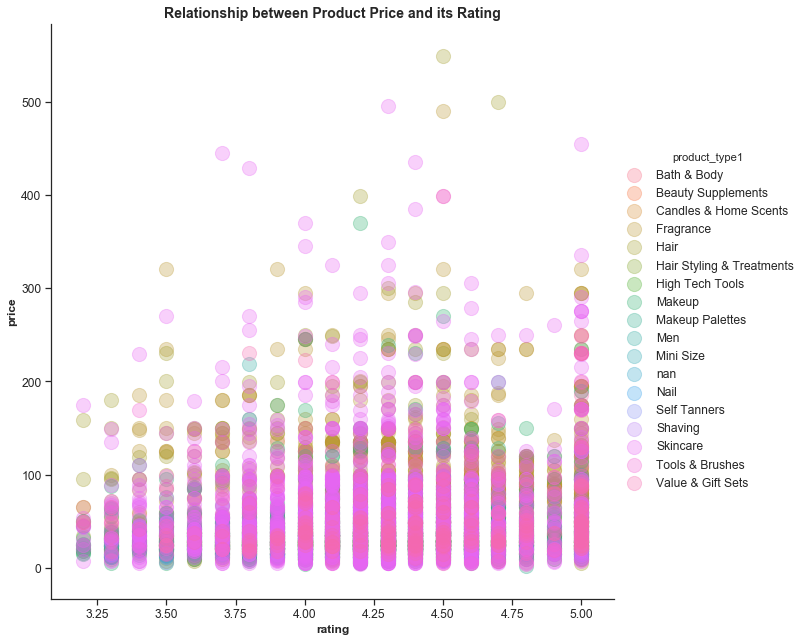

In [212]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='rating',
       y='price',
       data=sephora3,
       fit_reg=False,
       legend=True,
       size=9,
       hue='product_type1',
       scatter_kws={"s":200, "alpha":0.3})

plt.title('Relationship between Product Price and its Rating', weight='bold').set_fontsize('14')
plt.xlabel('rating', weight='bold').set_fontsize('12')
plt.ylabel('price', weight='bold').set_fontsize('12')

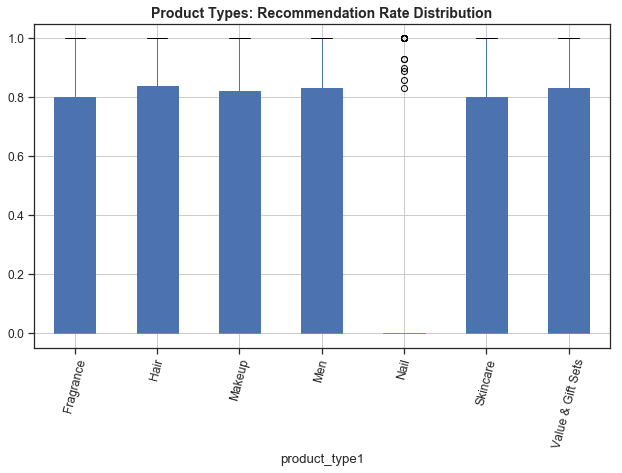

In [229]:
sephoraPlt.sort_values(by=['would_recommend'])

fig, ax = plt.subplots(figsize=(10,6))
sephoraPlt.boxplot(column=['would_recommend'], by='product_type1', ax=ax, patch_artist=True)
plt.xticks(rotation=75)
plt.suptitle("")
plt.title('Product Types: Recommendation Rate Distribution', weight='bold').set_fontsize('14')

### Missing Data

columns with missing data: (1044, 2)
(1044,)


Text(0, 0.5, 'Total # of Missing Values')

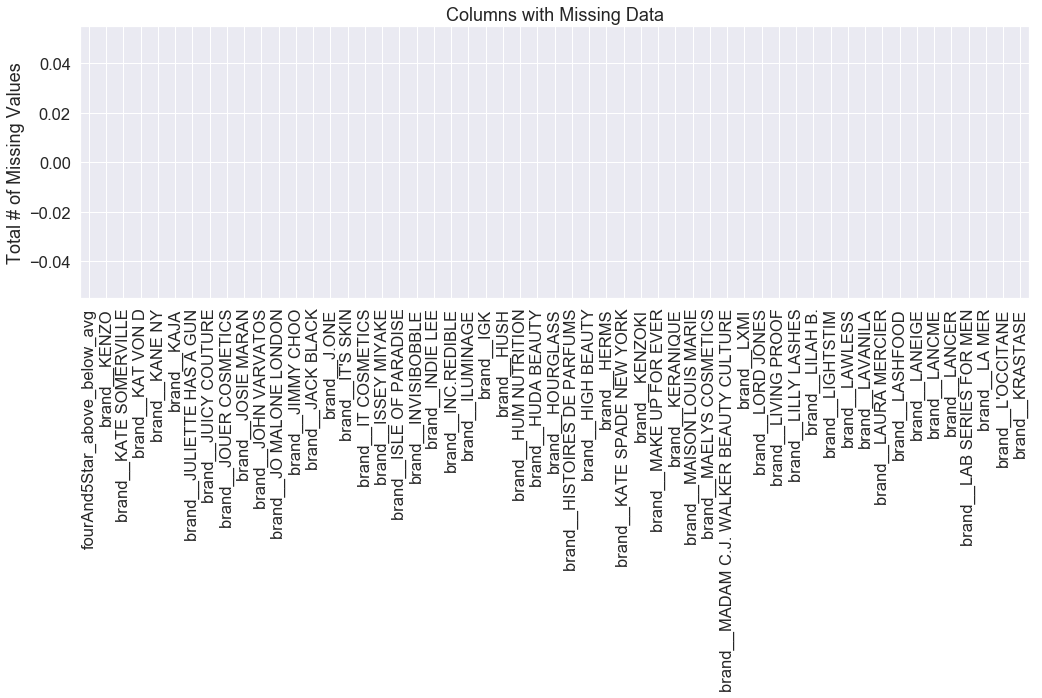

In [104]:
NAtotal = sephora3.isnull().sum().sort_values(ascending=False)
percent = (sephora3.isnull().sum()/sephora3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([NAtotal, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# 20 columns with missing data 
print('columns with missing data:', missing_data.shape)
print(NAtotal.shape)

plot = NAtotal.nlargest(55).plot(kind='bar', \
               title='Columns with Missing Data', figsize=(17,5), color = "purple")
plot.set_ylabel('Total # of Missing Values')

In [ ]:
missing_data.head(5)

In [ ]:
print('oneStar')
print(sephora3.oneStar.unique())
print('')
print("rating")
print(sephora3.rating.unique())
print('')
print("price")
print(sephora3.price.unique())
#print("size_ounces")
#print(sephora3.size_ounces.unique())

In [433]:
def highrating_count_perc(dataframe): 
    """map catagorical labels for generalized by % of 5 star ratings in reviews as well, aveg and  poor as specified by the keys below
    0=above_average, 1=average, 2=below_average, 3= poor"""
    dataframe['4&5StarCount%_rounded']=dataframe['4&5StarCount%'].round(1).astype('str')
    percentile_mapping={'1.0': 0, 
                 '0.9':0, 
                 '0.8':1, 
                 '0.7':2, 
                 '0.6':2, 
                 '0.5':3,
                 '0.4':3,
                 '0.3':3, 
                 '0.2':3,
                 '0.1':3,
                 '0.0':3}
    dataframe['4&5StarCount%_tile']=dataframe['4&5StarCount%_rounded'].map(percentile_mapping)

In [434]:
# sephora3.brand=sephora3.brand.astype('category').cat.codes

In [435]:
sephora3.to_csv('CleanSephora.csv')

## Gradient Boosting:

In [222]:
print(sephora3.rating.unique())
print(sephora3.shape)

sephoraML = sephora3[sephora3.rating > 0]
sephoraML = sephora3[sephora3.reviews > 1]

print("")
print("after dropping ")
print(sephoraML.rating.unique())
print(sephoraML.shape)

[3.6 5.  4.1 3.2 4.4 4.6 4.7 3.9 4.8 3.8 4.2 4.3 4.  4.5 3.5 3.4 3.7 3.3
 4.9]
(6793, 1044)

after dropping 
[3.6 5.  4.1 4.4 4.6 4.7 3.9 4.8 3.8 4.2 4.3 4.  4.5 3.5 3.7 4.9 3.4]
(6574, 1044)


In [223]:
X = sephoraML[['4and5Star_above_below_avg', 'size_ounces', 'loves', 'rating', 'would_recommend', 'reviews', 'fiveStars', 'fourStars', 'threeStars', 'twoStars', 'oneStar', 'product_type1__Bath & Body', 'product_type1__Beauty Supplements', 'product_type1__Candles & Home Scents', 'product_type1__Fragrance', 'product_type1__Gifts', 'product_type1__Hair', 'product_type1__Hair Styling & Treatments', 'product_type1__High Tech Tools', 'product_type1__Makeup', 'product_type1__Makeup Palettes', 'product_type1__Men', 'product_type1__Mini Size', 'product_type1__Nail', 'product_type1__Self Tanners', 'product_type1__Shaving', 'product_type1__Skincare', 'product_type1__Tools & Brushes', 'product_type1__Value & Gift Sets', 'product_type1__nan', 'brand__8GREENS', 'brand__ACQUA DI PARMA', 'brand__AERIN', 'brand__AETHER BEAUTY', 'brand__ALGENIST', 'brand__ALPHA-H', 'brand__ALTERNA HAIRCARE', 'brand__AMAZING COSMETICS', 'brand__AMIKA', 'brand__AMOREPACIFIC', 'brand__ANASTASIA BEVERLY HILLS', 'brand__ANTHONY', 'brand__ANTONYM', 'brand__APIVITA', 'brand__AQUIS', 'brand__ARTIS', 'brand__ARTIST COUTURE', 'brand__ATELIER COLOGNE', 'brand__BALENCIAGA', 'brand__BAREMINERALS', 'brand__BEAUTYBIO', 'brand__BEAUTYBLENDER', 'brand__BECCA', 'brand__BELIF', 'brand__BENEFIT COSMETICS', 'brand__BERDOUES', 'brand__BIO IONIC', 'brand__BIOEFFECT', 'brand__BIOSSANCE', 'brand__BITE BEAUTY', 'brand__BKR', 'brand__BLACK UP', 'brand__BLENDSMART', 'brand__BLINC', 'brand__BLINKING BEAUT', 'brand__BLITHE', 'brand__BOBBI BROWN', 'brand__BOSCIA', 'brand__BRIOGEO', 'brand__BSAME COSMETICS', 'brand__BUMBLE AND BUMBLE', 'brand__BURBERRY', 'brand__BUXOM', 'brand__BVLGARI', 'brand__BY ROSIE JANE', 'brand__CALVIN KLEIN', 'brand__CANE + AUSTIN', 'brand__CAPRI BLUE', 'brand__CAPTAIN BLANKENSHIP', 'brand__CAROLINA HERRERA', 'brand__CAUDALIE', 'brand__CELLU-CUP', 'brand__CHANEL', 'brand__CHARLOTTE TILBURY', 'brand__CHLO', 'brand__CHRISTIAN LOUBOUTIN', 
               'brand__CHRISTOPHE ROBIN', 'brand__CIAT LONDON', 'brand__CINEMA SECRETS', 'brand__CLARINS', 'brand__CLARISONIC', 'brand__CLEAN', 'brand__CLINIQUE', 'brand__COAL AND CANARY', 'brand__COCOFLOSS', 'brand__COMME DES GARCONS', 'brand__COMMODITY', 'brand__COMPTOIR SUD PACIFIQUE', 'brand__CONTURE', 'brand__COOLA', 'brand__COVER FX', 'brand__CRUSHED TONIC', 'brand__DEBORAH LIPPMANN', 'brand__DEREK LAM 10 CROSBY', 'brand__DERMADOCTOR', 'brand__DERMAFLASH', 'brand__DERMARCHE LABS', 'brand__DEVACURL', 'brand__DIAMANCEL', 'brand__DIOR', 'brand__DISNEY COLLECTION', 'brand__DOLCE&GABBANA', 'brand__DOMINIQUE COSMETICS', 'brand__DONNA KARAN', 'brand__DPHUE', "brand__DR ROEBUCK'S", 'brand__DR. BRANDT SKINCARE', 'brand__DR. DENNIS GROSS SKINCARE', 'brand__DR. JART+', 'brand__DRUNK ELEPHANT', 'brand__DRYBAR', 'brand__DTRT', 'brand__DUO', 'brand__DYSON', 'brand__EARTHS NECTAR', 'brand__EDIBLE BEAUTY', 'brand__EIGHT & BOB', 'brand__ELIZABETH AND JAMES', 'brand__ELLIS BROOKLYN', 'brand__ERBORIAN', 'brand__ERNO LASZLO', 'brand__ESTE LAUDER', "brand__ETAT LIBRE D'ORANGE", 'brand__EVE LOM', 'brand__EVIAN', 'brand__FARMACY', 'brand__FARSLI', 'brand__FENTY BEAUTY BY RIHANNA', 'brand__FIRST AID BEAUTY', 'brand__FOREO', 'brand__FORM', 'brand__FOUR SIGMATIC', 'brand__FRESH', 'brand__GHD', 'brand__GIORGIO ARMANI BEAUTY', 'brand__GIVENCHY', 'brand__GLAMGLOW', 'brand__GLO SCIENCE', 'brand__GLOW RECIPE', 
               'brand__GO-TO', 'brand__GOOD DYE YOUNG', 'brand__GOOGLE', 'brand__GRANDE COSMETICS', 'brand__GUCCI', 'brand__GUERLAIN', 'brand__HERBIVORE', 'brand__HERMS', 'brand__HIGH BEAUTY', 'brand__HISTOIRES DE PARFUMS', 'brand__HOURGLASS', 'brand__HUDA BEAUTY', 'brand__HUM NUTRITION', 'brand__HUSH', 'brand__IGK', 'brand__ILUMINAGE', 'brand__INC.REDIBLE', 'brand__INDIE LEE', 'brand__INVISIBOBBLE', 'brand__ISLE OF PARADISE', 'brand__ISSEY MIYAKE', 'brand__IT COSMETICS', "brand__IT'S SKIN", 'brand__J.ONE', 'brand__JACK BLACK', 'brand__JIMMY CHOO', 'brand__JO MALONE LONDON', 'brand__JOHN VARVATOS', 'brand__JOSIE MARAN', 'brand__JOUER COSMETICS', 'brand__JUICY COUTURE', 'brand__JULIETTE HAS A GUN', 'brand__KAJA', 'brand__KANE NY', 'brand__KAT VON D', 'brand__KATE SOMERVILLE', 'brand__KATE SPADE NEW YORK', 'brand__KENZO', 'brand__KENZOKI', 'brand__KERANIQUE', 'brand__KEVYN AUCOIN', "brand__KIEHL'S SINCE 1851", 'brand__KILIAN', 'brand__KLORANE', 'brand__KOH GEN DO', 'brand__KOPARI', 'brand__KORA ORGANICS', 'brand__KORRES', 'brand__KOSAS', 'brand__KRASTASE', "brand__L'OCCITANE", 'brand__LA MER', 'brand__LAB SERIES FOR MEN', 'brand__LANCER', 'brand__LANCME', 'brand__LANEIGE', 'brand__LASHFOOD', 'brand__LAURA MERCIER', 'brand__LAVANILA', 'brand__LAWLESS', 'brand__LIGHTSTIM', 'brand__LILAH B.', 'brand__LILLY LASHES', 'brand__LIVING PROOF', 'brand__LORD JONES', 'brand__LXMI', 'brand__MADAM C.J. WALKER BEAUTY CULTURE', 'brand__MAELYS COSMETICS', 'brand__MAISON LOUIS MARIE', 'brand__MAISON MARGIELA', 'brand__MAKE UP FOR EVER', 'brand__MAKEUP ERASER', 'brand__MARC JACOBS BEAUTY', 'brand__MARC JACOBS FRAGRANCES', 'brand__MARIO BADESCU', 'brand__MARVIS', 'brand__MDSOLARSCIENCES', 'brand__MICHAEL KORS', 'brand__MILK MAKEUP', 'brand__MIU MIU', 'brand__MONTBLANC', 'brand__MOON JUICE', 'brand__MOROCCANOIL', 'brand__MOSCHINO', 'brand__MOUNT LAI', 'brand__MUGLER', 'brand__MURAD', 
               'brand__NAILS INC.', 'brand__NARCISO RODRIGUEZ', 'brand__NARS', 'brand__NATASHA DENONA', 'brand__NATURALLY SERIOUS', 'brand__NEOGEN DERMALOGY', 'brand__NEST', 'brand__NO MO-STACHE', 'brand__NUDESTIX', 'brand__NUFACE', 'brand__O&M', 
               'brand__OBAGI CLINICAL', 'brand__OLAPLEX', 'brand__OLEHENRIKSEN', 'brand__OMOROVICZA', 'brand__ORIGINS', 'brand__OUAI', 'brand__PACO RABANNE', 'brand__PAT MCGRATH LABS', 'brand__PEACE OUT', 'brand__PERRICONE MD', 'brand__PETER THOMAS ROTH', 'brand__PHILOSOPHY', 'brand__PHLUR', 'brand__PINK SUGAR', 'brand__PINROSE', 'brand__PLAYA', 'brand__PMD', 'brand__PRADA', 'brand__PRETTY VULGAR', 'brand__PRIMARY RAW', 'brand__PRIVATE DOCTOR', 'brand__PROACTIV', 'brand__PRORASO', 'brand__QHEMET BIOLOGICS', 'brand__RAG & BONE', 'brand__RAHUA', 'brand__RALPH LAUREN', 'brand__REN CLEAN SKINCARE', 'brand__REVERIE', 'brand__RITA HAZAN', 'brand__RMS BEAUTY', 'brand__RODIN OLIO LUSSO', 'brand__ROSEBUD PERFUME CO.', 'brand__ROSSANO FERRETTI PARMA', 'brand__SACHAJUAN', 'brand__SAND & SKY', 'brand__SATURDAY SKIN', 'brand__SEED PHYTONUTRIENTS', 'brand__SEPHORA COLLECTION', 'brand__SEPHORA FAVORITES', 'brand__SHAVEWORKS', 'brand__SHHHOWERCAP', 'brand__SHISEIDO', 'brand__SK-II', 'brand__SKIN INC SUPPLEMENT BAR', 'brand__SKIN LAUNDRY', 'brand__SLIP', 'brand__SMASHBOX', 'brand__SOL DE JANEIRO', 'brand__SON & PARK', 'brand__ST. TROPEZ TANNING ESSENTIALS', 'brand__STACKEDSKINCARE', 'brand__STELLA MCCARTNEY', 'brand__STELLAR', 'brand__STILA', 'brand__SUMMER FRIDAYS', 'brand__SUNDAY RILEY', 'brand__SUPERGOOP!', 'brand__SURRATT BEAUTY', 'brand__T3', 'brand__TAN-LUXE', 'brand__TANGLE TEEZER', 'brand__TARTE', 'brand__TASTE BEAUTY', 'brand__TATA HARPER', 'brand__TATCHA', 'brand__THE 7 VIRTUES', 'brand__THE ART OF SHAVING', 'brand__THE BEAUTY CHEF', 'brand__THE ORDINARY', 'brand__TOCCA', 'brand__TOKYOMILK', 'brand__TOM FORD', 'brand__TOO COOL FOR SCHOOL', 'brand__TOO FACED', 'brand__TORY BURCH', 'brand__TOUCH IN SOL', 'brand__TRSTIQUE', 'brand__TWEEZERMAN', 'brand__URBAN DECAY', 'brand__VELOUR LASHES', 'brand__VERB', 'brand__VERNON FRANCOIS', 'brand__VERSACE', 'brand__VIKTOR&ROLF', 
               'brand__VIOLET VOSS', 'brand__VISEART', 'brand__VITA LIBERATA', 'brand__VITAL PROTEINS', 'brand__VITRUVI', 'brand__VOLITION BEAUTY', 'brand__VOLUSPA', 'brand__WANDER BEAUTY', 'brand__WELL-KEPT', 'brand__WELLECO', 'brand__WINKY LUX', 'brand__YOUTH TO THE PEOPLE', 'brand__YUNI', 'brand__YVES SAINT LAURENT', 'product_type2__Accessories', 'product_type2__Bath & Shower', 'product_type2__Best For', 'product_type2__Body Care', 'product_type2__Body Moisturizers', 'product_type2__Brushes & Applicators', 'product_type2__Cheek', 'product_type2__Cleansers', 'product_type2__Eye', 'product_type2__Eye Care', 'product_type2__Face', 'product_type2__Fragrance', 'product_type2__Hair', 'product_type2__Hair Styling & Treatments', 'product_type2__Hair Tools', 'product_type2__High Tech Tools', 'product_type2__Inner Beauty', 'product_type2__Lip', 'product_type2__Lip Treatments', 'product_type2__Makeup Brushes & Applicators', 'product_type2__Masks', 'product_type2__Men', 'product_type2__Moisturizers', 'product_type2__Other Needs', 'product_type2__Self Tanners', 'product_type2__Shampoo & Conditioner', 'product_type2__Shaving', 'product_type2__Skincare', 'product_type2__Sun Care', 'product_type2__Treatments', 'product_type2__Value & Gift Sets', 'product_type2__Women', 'product_type2__nan', 'size_ounces__ 0.1 ', 'size_ounces__ 0.118 ', 'size_ounces__ 0.12 ', 'size_ounces__ 0.13 ', 'size_ounces__ 0.14 ', 'size_ounces__ 0.16 ', 'size_ounces__ 0.19 ', 'size_ounces__ 0.2 ', 
               'size_ounces__ 0.21 ', 'size_ounces__ 0.22 ', 'size_ounces__ 0.23 ', 'size_ounces__ 0.24 ', 'size_ounces__ 0.25 ', 'size_ounces__ 0.27 ', 'size_ounces__ 0.30 ', 'size_ounces__ 0.32 ', 'size_ounces__ 0.33 ', 'size_ounces__ 0.34 ', 'size_ounces__ 0.35 ', 'size_ounces__ 0.37 ', 'size_ounces__ 0.4 ', 'size_ounces__ 0.5 ', 'size_ounces__ 0.50 ', 'size_ounces__ 0.51 ', 'size_ounces__ 0.66 ', 'size_ounces__ 0.67 ', 'size_ounces__ 0.68 ', 'size_ounces__ 0.7 ', 'size_ounces__ 0.75 ', 'size_ounces__ 0.8 ', 'size_ounces__ 0.84 ', 'size_ounces__ 0.85 ', 'size_ounces__ 1 ', 'size_ounces__ 1.01 ', 'size_ounces__ 1.08 ', 'size_ounces__ 1.12 ', 'size_ounces__ 1.18 ', 'size_ounces__ 1.2 ', 'size_ounces__ 1.25 ', 'size_ounces__ 1.3 ', 'size_ounces__ 1.35 ', 'size_ounces__ 1.4 ', 'size_ounces__ 1.41 ', 'size_ounces__ 1.5 ', 'size_ounces__ 1.52 ', 'size_ounces__ 1.6 ', 'size_ounces__ 1.67 ', 'size_ounces__ 1.68 ', 'size_ounces__ 1.69', 'size_ounces__ 1.69 ', 'size_ounces__ 1.7 ', 'size_ounces__ 1.70 ', 'size_ounces__ 1.75 ', 'size_ounces__ 1.76 ', 'size_ounces__ 10 ', 'size_ounces__ 10.1 ', 'size_ounces__ 10.15 ', 'size_ounces__ 10.2 ', 'size_ounces__ 10.5 ', 
               'size_ounces__ 10.6 ', 'size_ounces__ 10.8 ', 'size_ounces__ 12 ', 'size_ounces__ 13 ', 'size_ounces__ 13.4 ', 'size_ounces__ 13.5 ', 'size_ounces__ 14.1 ', 'size_ounces__ 16 ', 'size_ounces__ 16.5 ', 'size_ounces__ 16.9 ', 'size_ounces__ 2 ', 'size_ounces__ 2.1 ', 'size_ounces__ 2.2 ', 'size_ounces__ 2.3 ', 'size_ounces__ 2.4 ', 'size_ounces__ 2.5 ', 'size_ounces__ 2.53 ', 'size_ounces__ 2.54 ', 'size_ounces__ 2.6 ', 'size_ounces__ 2.7 ', 'size_ounces__ 2.8 ', 'size_ounces__ 3 ', 'size_ounces__ 3.1 ', 'size_ounces__ 3.2 ', 'size_ounces__ 3.3 ', 'size_ounces__ 3.33 ', 'size_ounces__ 3.38 ', 'size_ounces__ 3.4 ', 'size_ounces__ 3.5 ', 'size_ounces__ 3.6 ', 'size_ounces__ 3.7 ', 'size_ounces__ 3.8 ', 'size_ounces__ 32 ', 'size_ounces__ 4 ', 'size_ounces__ 4.0 ', 'size_ounces__ 4.1 ', 'size_ounces__ 4.2 ', 'size_ounces__ 4.3 ', 'size_ounces__ 4.4 ', 'size_ounces__ 4.5 ', 'size_ounces__ 4.7 ', 'size_ounces__ 4.75 ', 'size_ounces__ 5 ', 'size_ounces__ 5.07 ', 'size_ounces__ 5.1 ', 'size_ounces__ 5.2 ', 'size_ounces__ 5.3 ', 'size_ounces__ 5.4 ', 'size_ounces__ 5.41 ', 'size_ounces__ 5.5 ', 'size_ounces__ 5.9 ', 'size_ounces__ 6 ', 'size_ounces__ 6.2 ', 'size_ounces__ 6.3 ', 'size_ounces__ 6.5 ', 'size_ounces__ 6.7 ', 'size_ounces__ 6.75 ', 'size_ounces__ 6.8 ', 'size_ounces__ 6.9 ', 'size_ounces__ 7 ', 'size_ounces__ 7.0 ', 'size_ounces__ 7.1 ', 'size_ounces__ 7.3 ', 'size_ounces__ 7.5 ', 'size_ounces__ 7.7 ', 'size_ounces__ 8 ', 'size_ounces__ 8.1 ', 'size_ounces__ 8.2 ', 'size_ounces__ 8.33 ', 'size_ounces__ 8.4 ', 'size_ounces__ 8.45 ', 'size_ounces__ 8.5 ', 'size_ounces__ 9 ', 'size_ounces__ 9.3 ', 'size_ounces__.001 ', 'size_ounces__.004 ', 'size_ounces__.01 ', 'size_ounces__.016 ', 'size_ounces__.02 ', 'size_ounces__.03 ', 'size_ounces__.04 ', 'size_ounces__.041 ', 'size_ounces__.045 ', 'size_ounces__.056 ', 'size_ounces__.12 ', 'size_ounces__.15 ', 
               'size_ounces__.16 ', 'size_ounces__.17 ', 'size_ounces__.20 ', 'size_ounces__.23 ', 'size_ounces__.24 ', 'size_ounces__.25 ', 'size_ounces__.27', 'size_ounces__.27 ', 'size_ounces__.28 ', 'size_ounces__.31 ', 'size_ounces__.32 ', 
               'size_ounces__.33', 'size_ounces__.33 ', 'size_ounces__.34', 'size_ounces__.35 ', 'size_ounces__.38 ', 'size_ounces__.42 ', 'size_ounces__.46 ', 'size_ounces__.49 ', 'size_ounces__.5 ', 'size_ounces__.50 ', 'size_ounces__.85 ', 'size_ounces__0 ', 'size_ounces__0.002 ', 'size_ounces__0.003 ', 'size_ounces__0.0038 ', 'size_ounces__0.004 ', 'size_ounces__0.005 ', 'size_ounces__0.0056 ', 'size_ounces__0.007 ', 'size_ounces__0.0088 ', 'size_ounces__0.009 ', 'size_ounces__0.01 ', 'size_ounces__0.012 ', 'size_ounces__0.016 ', 'size_ounces__0.017 ', 'size_ounces__0.0176 ', 'size_ounces__0.018 ', 'size_ounces__0.019 ', 'size_ounces__0.02 ', 'size_ounces__0.023 ', 'size_ounces__0.025 ', 'size_ounces__0.028 ', 'size_ounces__0.03 ', 'size_ounces__0.034 ', 'size_ounces__0.035 ', 'size_ounces__0.036 ', 'size_ounces__0.037 ', 'size_ounces__0.04 ', 'size_ounces__0.042 ', 'size_ounces__0.045 ', 'size_ounces__0.047 ', 'size_ounces__0.048 ', 'size_ounces__0.049 ', 'size_ounces__0.05 ', 'size_ounces__0.052 ', 'size_ounces__0.054 ', 'size_ounces__0.056 ', 'size_ounces__0.059 ', 'size_ounces__0.06 ', 'size_ounces__0.067 ', 'size_ounces__0.07 ', 'size_ounces__0.074 ', 'size_ounces__0.08 ', 'size_ounces__0.084 ', 'size_ounces__0.085 ', 'size_ounces__0.086 ', 'size_ounces__0.087 ', 'size_ounces__0.088 ', 'size_ounces__0.09 ', 'size_ounces__0.0915 ', 'size_ounces__0.096 ', 'size_ounces__0.1 ', 'size_ounces__0.10 ', 'size_ounces__0.105 ', 'size_ounces__0.106 ', 'size_ounces__0.11 ', 'size_ounces__0.118 ', 'size_ounces__0.12 ', 'size_ounces__0.123 ', 'size_ounces__0.13 ', 'size_ounces__0.134 ', 'size_ounces__0.135 ', 'size_ounces__0.139 ', 'size_ounces__0.14', 'size_ounces__0.14 ', 'size_ounces__0.141 ', 'size_ounces__0.15 ', 'size_ounces__0.153 ', 'size_ounces__0.16 ', 'size_ounces__0.169 ', 'size_ounces__0.17', 'size_ounces__0.17 ', 'size_ounces__0.18 ', 'size_ounces__0.19 ',
               'size_ounces__0.192 ', 'size_ounces__0.2 ', 'size_ounces__0.20 ', 'size_ounces__0.208 ', 'size_ounces__0.21 ', 'size_ounces__0.22 ', 'size_ounces__0.23 ', 'size_ounces__0.24 ', 'size_ounces__0.247 ', 'size_ounces__0.25 ', 'size_ounces__0.26 ', 'size_ounces__0.264 ', 'size_ounces__0.27', 'size_ounces__0.27 ', 'size_ounces__0.28 ', 'size_ounces__0.282 ', 'size_ounces__0.29 ', 'size_ounces__0.3', 'size_ounces__0.3 ', 'size_ounces__0.30 ', 'size_ounces__0.31 ', 'size_ounces__0.32 ', 'size_ounces__0.33', 'size_ounces__0.33 ', 'size_ounces__0.34', 'size_ounces__0.34 ', 'size_ounces__0.35 ', 'size_ounces__0.36 ', 'size_ounces__0.37 ', 'size_ounces__0.38 ', 'size_ounces__0.39 ', 'size_ounces__0.4', 'size_ounces__0.4 ', 'size_ounces__0.40 ', 
               'size_ounces__0.41 ', 'size_ounces__0.42 ', 'size_ounces__0.43 ', 'size_ounces__0.44 ', 'size_ounces__0.45 ', 'size_ounces__0.46 ', 'size_ounces__0.47 ', 'size_ounces__0.48 ', 'size_ounces__0.49', 'size_ounces__0.49 ', 'size_ounces__0.5 ', 'size_ounces__0.50 ', 'size_ounces__0.51 ', 'size_ounces__0.52 ', 'size_ounces__0.53 ', 'size_ounces__0.54 ', 'size_ounces__0.55 ', 'size_ounces__0.56 ', 'size_ounces__0.6 ', 'size_ounces__0.61 ', 'size_ounces__0.63 ', 'size_ounces__0.66 ', 'size_ounces__0.67', 'size_ounces__0.67 ', 'size_ounces__0.68 ', 'size_ounces__0.7 ', 'size_ounces__0.70 ', 'size_ounces__0.74 ', 'size_ounces__0.75 ', 'size_ounces__0.76 ', 'size_ounces__0.77 ', 'size_ounces__0.78 ', 'size_ounces__0.8 ', 'size_ounces__0.84 ', 'size_ounces__0.85 ', 'size_ounces__0.87 ', 'size_ounces__0.88 ', 'size_ounces__0.89 ', 'size_ounces__0.9', 'size_ounces__0.9 ', 'size_ounces__0.94 ', 'size_ounces__0.95 ', 'size_ounces__0.98 ', 'size_ounces__00.6 ', 'size_ounces__1', 'size_ounces__1 ', 'size_ounces__1.0 ', 'size_ounces__1.01 ', 'size_ounces__1.014 ', 'size_ounces__1.02 ', 'size_ounces__1.04 ', 'size_ounces__1.05 ', 'size_ounces__1.06 ', 'size_ounces__1.08 ', 'size_ounces__1.1 ', 'size_ounces__1.14 ', 'size_ounces__1.17 ', 'size_ounces__1.18 ', 'size_ounces__1.2 ', 'size_ounces__1.23 ', 'size_ounces__1.3 ', 'size_ounces__1.33 ', 'size_ounces__1.34 ', 'size_ounces__1.35 ', 'size_ounces__1.4 ', 'size_ounces__1.41 ', 'size_ounces__1.5 ', 'size_ounces__1.52 ', 'size_ounces__1.6', 'size_ounces__1.6 ', 'size_ounces__1.61 ', 'size_ounces__1.64 ', 'size_ounces__1.65 ', 'size_ounces__1.67 ', 'size_ounces__1.68 ', 'size_ounces__1.69', 'size_ounces__1.69 ', 'size_ounces__1.7', 'size_ounces__1.7 ', 'size_ounces__1.75 ', 'size_ounces__1.76 ', 'size_ounces__1.8', 'size_ounces__1.8 ', 'size_ounces__1.86 ', 'size_ounces__1.9 ', 'size_ounces__10 ', 'size_ounces__10.1 ', 'size_ounces__10.14 ', 
               'size_ounces__10.2 ', 'size_ounces__10.37 ', 'size_ounces__11 ', 'size_ounces__11.1 ', 'size_ounces__11.2 ', 'size_ounces__11.49 ', 'size_ounces__11.5 ', 'size_ounces__11.8 ', 'size_ounces__12 ', 'size_ounces__12.5 ', 'size_ounces__123 ', 'size_ounces__13.5 ', 'size_ounces__16 ', 'size_ounces__16.9 ', 'size_ounces__19 ', 'size_ounces__2', 'size_ounces__2 ', 'size_ounces__2.0 ', 'size_ounces__2.02 ', 'size_ounces__2.029 ', 'size_ounces__2.03 ', 'size_ounces__2.1 ', 'size_ounces__2.12 ', 'size_ounces__2.14 ', 'size_ounces__2.2 ', 'size_ounces__2.25 ', 'size_ounces__2.3 ', 'size_ounces__2.36 ', 'size_ounces__2.37 ', 'size_ounces__2.4 ', 'size_ounces__2.47 ', 'size_ounces__2.5', 'size_ounces__2.5 ', 'size_ounces__2.53 ', 'size_ounces__2.54', 'size_ounces__2.54 ', 
                    'size_ounces__2.6 ', 'size_ounces__2.65 ', 'size_ounces__2.7 ', 'size_ounces__2.70 ', 'size_ounces__2.75 ', 'size_ounces__2.8 ', 'size_ounces__2.82 ', 'size_ounces__2.87 ', 'size_ounces__21.1 ', 'size_ounces__22 ', 'size_ounces__3 ', 'size_ounces__3.0 ', 'size_ounces__3.04 ', 'size_ounces__3.17 ', 'size_ounces__3.2 ', 'size_ounces__3.3 ', 'size_ounces__3.38 ', 'size_ounces__3.39 ', 'size_ounces__3.4', 'size_ounces__3.4 ', 'size_ounces__3.5 ', 'size_ounces__3.52 ', 'size_ounces__3.53 ', 'size_ounces__3.6 ', 'size_ounces__3.65 ', 'size_ounces__3.75 ', 'size_ounces__3.8 ', 'size_ounces__3.9 ', 'size_ounces__32 ', 'size_ounces__4', 'size_ounces__4 ', 'size_ounces__4.0 ', 'size_ounces__4.05 ',
                    'size_ounces__4.08 ', 'size_ounces__4.1 ', 'size_ounces__4.2 ', 'size_ounces__4.22 ', 'size_ounces__4.25 ', 'size_ounces__4.3 ', 'size_ounces__4.35 ', 'size_ounces__4.39 ', 'size_ounces__4.4 ', 'size_ounces__4.5 ', 'size_ounces__4.6 ', 'size_ounces__4.7 ', 'size_ounces__4.73 ', 'size_ounces__4.75 ', 'size_ounces__4.8 ', 'size_ounces__4.9 ', 'size_ounces__5 ', 'size_ounces__5.0 ', 'size_ounces__5.06 ', 'size_ounces__5.07 ', 'size_ounces__5.1 ', 'size_ounces__5.2 ', 'size_ounces__5.25 ', 'size_ounces__5.29 ', 'size_ounces__5.3 ', 'size_ounces__5.4 ', 'size_ounces__5.5 ', 'size_ounces__5.6 ', 'size_ounces__5.7 ', 'size_ounces__5.8 ', 'size_ounces__5.82 ', 'size_ounces__5.9', 'size_ounces__5.9 ', 'size_ounces__5.99 ', 'size_ounces__6 ', 'size_ounces__6.1 ', 'size_ounces__6.17 ', 'size_ounces__6.2', 'size_ounces__6.25 ', 'size_ounces__6.3 ', 'size_ounces__6.4 ', 'size_ounces__6.5', 'size_ounces__6.5 ', 'size_ounces__6.59 ', 'size_ounces__6.6 ', 'size_ounces__6.7 ', 'size_ounces__6.75 ', 'size_ounces__6.76 ', 'size_ounces__6.8 ', 'size_ounces__6.9 ', 'size_ounces__7 ', 'size_ounces__7.0 ', 'size_ounces__7.05 ', 'size_ounces__7.1 ', 'size_ounces__7.2 ', 'size_ounces__7.5 ', 'size_ounces__7.6 ', 'size_ounces__7.7 ', 'size_ounces__7.75 ', 'size_ounces__8 ', 'size_ounces__8.1', 'size_ounces__8.1 ', 'size_ounces__8.2 ', 'size_ounces__8.3 ', 'size_ounces__8.33 ', 'size_ounces__8.4 ', 'size_ounces__8.45 ', 'size_ounces__8.5 ', 'size_ounces__8.8 ', 'size_ounces__8.9 ', 'size_ounces__9 ', 'size_ounces__9.3 ', 'size_ounces__9.9 ', 'product_type3_label', 'rating_label', 'would_recommend_label', 'discounted_value_label', 'on_sale_label', 'val_normal_skin_label', 'oily_skin_label', 'dry_skin_label', 'combination_skin_label', 'sensitive_skin_label', 'all_skin_label', 'skin_type_label', 'vegan_label', 'tested_label', 'research_label', 'formulated_without_label', 'clean_label']]  

y=sephoraML['price']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

KeyError: "['4and5Star_above_below_avg' 'product_type3_label' 'rating_label'] not in index"

In [559]:
X.head()

,rating,price,discounted_value,on_sale,size_ounces,loves,val_normal_skin,oily_skin,dry_skin,val_combination_skin,...,Mini Size,Nail,Self Tanners,Shaving,Skincare,Tools & Brushes,Value & Gift Sets,product_type2_label,product_type3_label,brand_label
0,4,52.0,False,False,1.7,60000,True,True,True,True,...,0,0,0,0,1,0,0,29,54,88
1,4,28.0,False,False,2,994,True,True,True,True,...,0,0,0,0,1,0,0,22,106,193
2,3,46.0,False,False,6,108,True,True,True,True,...,0,0,0,0,1,0,0,24,62,69
3,3,29.0,False,False,0.25,90000,True,True,True,True,...,0,0,0,0,0,0,0,10,64,70
4,4,28.0,False,False,0.1,10000,False,False,False,False,...,0,0,0,0,0,0,0,8,46,24
